In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
from myfunctions import * 
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score#,silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from itertools import accumulate

In [2]:
# from importlib import reload
# import myfunctions
# reload(myfunctions)
# from myfunctions import* 

In [2]:
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'pdf')
plt.rcParams.update({'font.size': 12,
                     'xtick.labelsize' : 12,
                     'ytick.labelsize' : 12,
                     'axes.grid': False})
my_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
#sns.set_theme(style='white') # style='whitegrid'
#plt.style.available
#plt.style.use('seaborn-dark-palette') #default
#sns.set(font_scale=1.1)

In [5]:
#sns.set()
#sns.set_theme(style="white")

# Introduction

La norma linguistica può essere definita come un insieme di regole, che riguardano tutti i livelli della lingua – fonologia, morfologia, sintassi, lessico, testualità –, accettate dalla stragrande maggioranza dei parlanti e scriventi in un determinato periodo e contesto storico-culturale. (Giovanardi 2010: 17).

*The Glasgow Norms* è un insieme contenente 5553 parole inglesi con valutazioni normative su nove dimensioni psicolinguistiche: *arousal, valence, dominance, concreteness, imageability, familiarity, age of acquisition, semantic size,* e *gender.* Inoltre, dataset che ci apprestiamo ad analizzare, permette di estendere l'analisi ad altre tre dimensioni: *length, polysemy, web corpus frequency.* 

I dati dello studio originario sono stati raccolti da un gruppo di ricercatori dell'università di Glasgow, attraverso un esperimento a cui hanno partecipato 829 studenti madrelingua inglese della medesima università. I partecipanti hanno deciso volontariamente di prendere parte all'esperimento, attratti da ricompense accademiche ovvero monetarie. 

Il campione presenta diverse problematiche: è di tipo non probabilistico, presenta vizi di autoselezione dei partecipanti e vizi di non rappresentatività (gli intervistati sono tutti giovani di sesso prevalentemente femminile e, presumibilmente, di estrazione sociale medio-alta). Pertanto, a prescidere dall'analisi che si intende svolgere sul campione, non è possibile fare inferenza su nessuna popolazione: né quella dei madrelingua inglese, né quella di Glasgow, né tantomeno quella degli studenti universitari.

Ad ogni partecipante è stata assegnato in modo casuale una lista di parole da valutare; alcune di esse contenevano 101 vocaboli, altre 150. Tutti gli attributi sono di tipo quantitativo. Le nove variabili originarie sono di tipo continuo perché ogni parola del dataset è la media, approssimativamente, delle valutazioni di 33 diversi partecipanti. La variabile *polysemy* è binaria, mentre le due rimanenti, non essendo frutto di valutazioni individuali, sono discrete. In generale, quindi, si può parlare del dataset come di una matrice di dati (*data matrix type*).  

Le prime tre dimensioni sono state valutate dai singoli partecipanti su una scala di interi da 1 a 9. Tipicamente, questi attributi sono usati in psicolinguistica per caratterizzare l'impatto emotivo di una parola:
- **Arousal** (AROU): definisce il grado di eccitamento emotivo trasmesso dalla parola. Con un punteggio medio di 2.057, è *dull* (noioso, monotono, spento) la parola che nel dataset trasmette la più bassa eccitazione emotiva. Il più alto grado di *arousal*, 8.18, è stato invece riscontrato nella parola *passionate* (appassionato, passionale).
- **Valence** (VAL): definisce il grado di positività di una parola. Nel dataset, ad esempio, la parola con la valenza più bassa è *rape* (stupro), con una media di 1.03; la valenza più alta, invece, è contesa tra le parole *love* e *peace* (8.647).
- **Dominance** (DOM): definisce il grado di controllo che una parola suscita. Con un valore di 1.941, la parola con il più basso grado di *dominance* all'interno del dataset è *powerless* (impotente); il più alto grado di controllo, 8.371, è stato associato alla parola *dominate* (dominare, prevalere).

Le restanti dimensioni sotto indagine, invece, sono state valutate dai singoli partecipanti su una scala di interi da 1 a 7:
- **Concreteness** (CNC): è una misura di quanto concreta sia una parola. In particolare, rappresenta il grado con cui qualcosa può essere sperimentato dai nostri sensi. La parola più astratta del dataset è *infinite* (infinito), con un punteggio di 1.636. Quella più concreta, invece, è *bridge* (ponte), con una media di 6.938.
- **Imageability** (IMAG): misura quanto qualcosa sia facile da immaginare. La parola con una *imageability* più bassa, 1.737, è *quiescent* (quiescenza, inattività, a riposo, accondiscendenza). *Carrot*, invece, con un punteggio medio di 6.941, risulta essere la parola più facile da immaginare.
- **Familiarity** (FAM): è una misura di quanto è familiare qualcosa ed in particolare, di quanto una parola sia vicina all'esperienza soggettiva. Con punteggio di 1.647, la parola che risulta essere meno familiare è *zephyr* (zefiro, brezza). Con una media di 6.939 sono due le parole più familiari: *music* e *university* 
- **Age of acquisition** (AOA): misura l'età stimata in cui una parola è stata appresa per la prima volta. Per i primi 6 punti, la scala è definita come una serie di periodi consecutivi di 2 anni, dall'età di 0 a 12 anni; un punteggio di 7, invece, indica un periodo di tempo che va dai 13 anni in poi. La parola *mum*, con una media di 1.219, risulta essere la parola del dataset appresa per prima. *Twitter*, invece, con 6.971, è la parola che i partecipanti hanno appreso più tardi.
- **Semantic size** (SIZE): misura la dimensione fisica o concettuale dell'oggetto/concetto cui la parola si riferisce. *Crumb* (briciola), con 1.375, è la parola ritenuta più "piccola". Mentre *universe* con un punteggio medio di 6.912 è quella più "grande". 
- **Gender association** (GEND): misura il grado di "mascolinità" di una parola. Con un punteggio pari a 1.0, la parola più femminile è *lady*. *Male*,invece, con una media di 6.971, è risultata essere la parola più vicina al genere maschile.

oltre ai nove attributi appena presenti, il dataset che ci apprestiamo ad analizzare ne fornisce altri tre: 
- **Length** (LEN): indica da quante lettere è composta una parola. Le parole *tv* e *up*, con due sole lettere risultano essere quelle più brevi. *Intercontinental*, invece, con le sue 16 lettere, è quella più lunga.
- **Web Corpus Freq** (FREQ): è la frequenza assoluta di una parola nel Google Newspapers Corpus. Le parole meno e più frequenti sono, rispettivamente, *enthrall* (ammaliare, incantare) e *all*. 
- **Polysemy** (POLY): è un attributo binario che indica se, nel dataset, la parola può assumere più di un signigicato. In particolare, il dataset contiene: 
    - 289 parole con due significati;
    - 69 parole con tre significati;
    - 19 parole con quattro significati;
    - 2 parole con cinque significati.

In totale, quindi, le parole ambigue sono 379 mentre quelle dismbiguate sono 871. Il dataset origniario da 5553 parole viene presentato in due sottinsiemi distinti: il primo contenente 4682 parole non disambiguate; il secondo formato dalle restanti 871 diambiguate (questo dataset è primo degli attributi length, web_corpus_frequency, polysemy). Per il momento ci concentreremo sul primo dataset.

In [16]:
# importo il dataset, cambio il nome delle variabili e approssimo i valori float alla seconda cifra decimale.
# Inoltre, formatto la variabile web_corpus_freq_ in notazione scientifica. Questo è fatto per rimpicciolire la dimensione 
# delle tabelle così da non sforare i margini del foglio quando si riporta il tutto in latex.

df = pd.read_csv('words_glasgow.csv', index_col = 'word')

new_cols = {'length':'LEN', 'arousal':'AROU', 'valence':'VAL', 'dominance':'DOM', 'concreteness':'CNC', 
            'imageability':'IMAG', 'familiarity':'FAM', 'aoa':'AOA', 'semsize':'SIZE', 'gender':'GEND',  
            'polysemy':'POLY', 'web_corpus_freq':'FREQ'}
df = df.rename(columns=new_cols)
pd.set_option('display.float_format', '{:.3g}'.format)
df.head(3)

LEN  AROU  VAL  DOM  CNC  IMAG  FAM  AOA  SIZE  GEND  POLY  \
word                                                                     
abattoir      8   4.2 2.86 4.33 5.46  4.39 2.38 6.76  4.65  5.39     0   
abbey         5  3.12 5.78 4.67 5.91  5.34 3.32 5.18  5.12   3.3     0   
abbreviate   10  3.27 5.25 5.24 3.29  3.18 5.12 5.54  2.67  3.97     0   

               FREQ  
word                 
abattoir    1.6e+05  
abbey      4.22e+06  
abbreviate  1.4e+05

In [4]:
df.tail(3)

LEN  AROU  VAL  DOM  CNC  IMAG  FAM  AOA  SIZE  GEND  POLY     FREQ
word                                                                        
zest       4  5.97 6.82 6.12 4.44  4.03    4 5.36  2.64  3.45     0 6.55e+05
zoo        3  5.91 6.24 5.49 6.12  6.44 5.66 2.32  4.84  4.06     0 1.16e+07
zoology    7  4.57 5.76 5.11 4.43  3.91 4.38 5.82  4.57  3.66     0 1.67e+06

In [5]:
# dimensione del dataset non disambiguato

df.shape

(4682, 12)

In [6]:
#controllo se ci sono righe duplicate

df.duplicated().sum()

0

In [7]:
# data understanding
# Per ogni attributo trovo le parole che hanno il punteggio più alto e più basso.

for attribute in df.drop('POLY', axis = 1).columns:
    idx_m = df.index[df[attribute] == df[attribute].min()].tolist()
    idx_M = df.index[df[attribute] == df[attribute].max()].tolist()
    print(attribute + ':')
    print('\tmin:', df[attribute].min(), '|', 'words:', ', '.join(idx_m))
    print('\tmax:', df[attribute].max(), '|', 'words:', ', '.join(idx_M))

LEN:
	min: 2 | words: TV, up
	max: 16 | words: intercontinental
AROU:
	min: 2.057 | words: dull
	max: 8.177 | words: passionate
VAL:
	min: 1.03 | words: rape
	max: 8.647 | words: love, peace
DOM:
	min: 1.941 | words: powerless
	max: 8.371 | words: dominate
CNC:
	min: 1.636 | words: infinite
	max: 6.938 | words: bridge
IMAG:
	min: 1.737 | words: quiescent
	max: 6.941 | words: carrot
FAM:
	min: 1.647 | words: zephyr
	max: 6.939 | words: music, university
AOA:
	min: 1.219 | words: Mum
	max: 6.971 | words: Twitter
SIZE:
	min: 1.375 | words: crumb
	max: 6.912 | words: universe
GEND:
	min: 1.0 | words: lady
	max: 6.971 | words: man
FREQ:
	min: 12770.0 | words: enthral
	max: 2022459848.0 | words: all


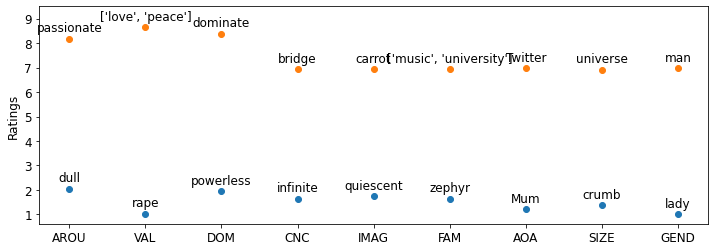

In [11]:
idx_m = []
idx_M = []
for attribute in df.drop(['LEN', 'FREQ','POLY'], axis = 1).columns:
    idx_m.append(df.index[df[attribute] == df[attribute].min()].tolist())
    idx_M.append(df.index[df[attribute] == df[attribute].max()].tolist())

idx_m = [lst if (len(lst) > 1) else lst[0] for lst in idx_m]
idx_M = [lst if (len(lst) > 1) else lst[0] for lst in idx_M]

min_values = df.drop(['LEN', 'FREQ','POLY'], axis = 1).describe().loc['min'].tolist()
max_values = df.drop(['LEN', 'FREQ','POLY'], axis = 1).describe().loc['max'].tolist()

plt.figure(figsize = (12,4))
xticks = range(9)

plt.plot(xticks, min_values, '.', ms = 12)
for i, occurrences in enumerate(min_values):
    plt.annotate(idx_m[i], xy = (i, occurrences), xytext = (i, occurrences + 0.3), ha = 'center') 
    
plt.plot(xticks, max_values, '.', ms = 12)
for i, occurrences in enumerate(max_values):
    plt.annotate(idx_M[i], xy = (i, occurrences), xytext = (i, occurrences + 0.3), ha = 'center') 

plt.xticks(xticks, df.columns.drop(['LEN', 'FREQ','POLY']).tolist())
plt.ylim(top=9.5)
plt.ylabel('Ratings')
#plt.xlim(left=-0.5)
plt.show()

In [12]:
# controllo se ci sono duplicati 

df.index.is_unique

True

In [13]:
# Controllo il dominio (syntactic accuracy)

df.describe().loc[['min', 'max', 'std']]

LEN  AROU  VAL   DOM  CNC  IMAG   FAM  AOA  SIZE  GEND  POLY     FREQ
min    2  2.06 1.03  1.94 1.64  1.74  1.65 1.22  1.38     1     0 1.28e+04
max   16  8.18 8.65  8.37 6.94  6.94  6.94 6.97  6.91  6.97     1 2.02e+09
std 2.01   1.1 1.59 0.931 1.43  1.36 0.921 1.25  1.02 0.912 0.273 8.49e+07

I dati degli attributi originari sono sintatticamente accurati, dal momento che risultano tutti compresi nel range $[1,9]$  (gli attributi: arousal, valence, dominance) e $[1,7]$ (gli altri). Inoltre, non possono esserci errori di trascrizione perché non ci sono variabili qualitative e perché i dati sono raccolti tramite un portale web apposito. Infine, l'assenza di duplicati, ci permette di affermare che il dataset è privo di ridondanze.

In [14]:
# controllo la semantic accuracy
# controllo se la lunghezza delle parole è uguale a quella dischiarata

(df.index.str.len().tolist() ==  df['LEN']).sum() == df.shape[0]

True

Nel dataset la lunghezza reale delle parole corrisponde con quella dichiarata nella colonna `length`. Dal grafico risulta evidente come le parole di lunghezza compresa nel range $[4,8]$ siano predominanti all'interno del dataset.

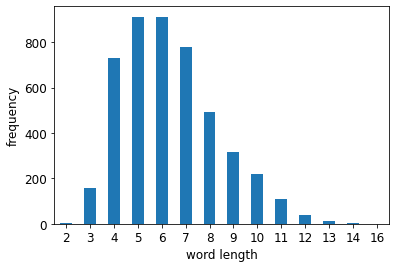

In [15]:
lengths_sorted = df['LEN'].sort_values()
lengths_sorted.value_counts(sort = False).plot.bar(rot = 0)
plt.xlabel('word length')
plt.ylabel('frequency')
plt.show()

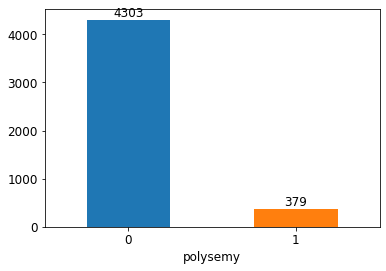

In [16]:
# controllo se ci sono unbalanced data

df['POLY'].value_counts().plot.bar(color = sns.color_palette()) # ['#1f77b4', '#ff7f0e']
plt.xticks(rotation = 0)
for i, occurrences in enumerate(df['POLY'].value_counts()):
    plt.annotate(occurrences, xy = (i, occurrences), ha='center', va='bottom') 
plt.xlabel('polysemy')
plt.show()

In [17]:
format(df['POLY'].value_counts()[1] / df['POLY'].value_counts()[0], '.2%')

'8.81%'

Solamente l'8.81% dei record del dataset presenta un valore di *polysemy* pari a 1. Dal momento, quindi, che la quasi totalità delle parole del dataset è stata presentata in modo non disambiguato, possiamo definire *polisemy* come un attributo binario asimmetrico. Questo tipo di attributi è particolarmente importante per l'association analysis.

**Nota:**
attenzione però il libro identifica in questo modo gli attributi binari per i quali solo gli oggetti con valore 1 sono importanti.

In [13]:
# Per ogni parola, controllo se, per ogni attributo, il punteggio assegnato
# è ragionevole. Non si può fare un controllo sull'intero dataset, quindi 
# controllo le prime e le ultime 5 parole per ogni attributo.

for attr in df.columns:
    if attr not in {'LEN', 'POLY'}:
        var = df[attr].dropna().sort_values()
        print(f"{attr:=^40}")
        print('\tPunteggi più bassi:\n', var[:5].to_string(), end = '\n\n')
        print('\tPunteggi più alti:\n', var[-5:].to_string())

==================AROU==================
	Punteggi più bassi:
 word
dull       2.06
sluggish   2.06
dustbin    2.09
boring      2.2
ironing    2.22

	Punteggi più alti:
 word
aroused       7.94
spectacular   7.97
kiss             8
love          8.15
passionate    8.18
==================VAL===================
	Punteggi più bassi:
 word
rape       1.03
genocide   1.12
cancer     1.22
racist     1.23
murderer   1.24

	Punteggi più alti:
 word
happiness     8.57
trustworthy   8.58
loving         8.6
peace         8.65
love          8.65
==================DOM===================
	Punteggi più bassi:
 word
powerless    1.94
humiliated   2.17
fearful      2.19
depression   2.21
slave        2.27

	Punteggi più alti:
 word
leader         7.77
independence   7.81
independent    7.94
powerful       7.94
dominate       8.37
==================CNC===================
	Punteggi più bassi:
 word
infinite     1.64
immoral      1.65
abstract     1.71
philosophy   1.76
morality     1.77

	Punteggi più al

In generale, l'accuratezza semantica delle parole controllate risulta essere confermata. L'unica stranezza riguarda la parola "edificio" che sembra essere poco comune. Il Cambridge Dictionary la definisce come "a large building, especially an impressive one". Il punteggio basso forse è dovuto al fatto che a Glasgow ci sono poche costruzioni con queste caratteristiche.

Di sotto invece possiamo vedere come si distribuiscono le variabili dello studio originario.

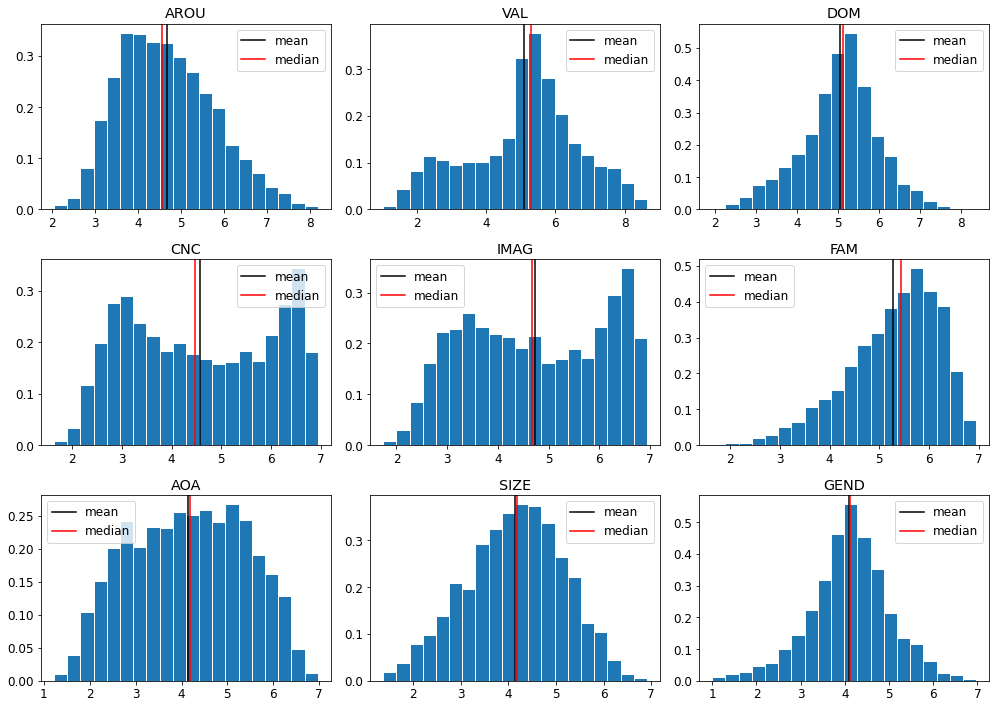

In [28]:
orig_df = df.drop(['LEN', 'FREQ', 'POLY'], axis = 1)
plt.figure(figsize=(14, 10))

for i, attribute in enumerate(orig_df.columns.tolist(), 1):
    plt.subplot(3, 3, i)
    orig_df[attribute].hist(density = True, grid = False, bins = 20, edgecolor='white')
    plt.axvline(orig_df[attribute].mean(), color='k', linestyle='-', linewidth=1.5, label = 'mean')
    plt.axvline(orig_df[attribute].median(), color='r', linestyle='-', linewidth=1.5, label = 'median')
    #orig_df[attribute].plot.kde()    
    plt.title(attribute)
    plt.legend(loc = 'best', labels = ['mean', 'median'])
    
plt.tight_layout()
plt.show()

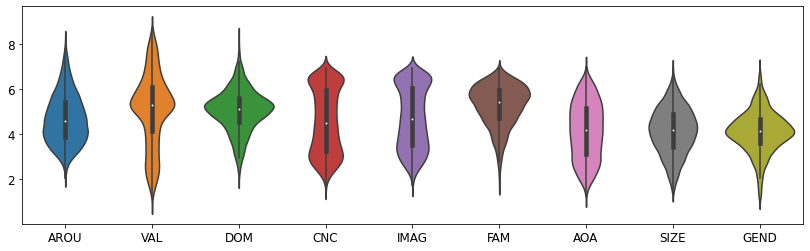

In [29]:
plt.figure(figsize=(14,4))
ax = sns.violinplot(data = orig_df)
plt.show()

In [30]:
df.describe()

LEN     AROU      VAL      DOM      CNC     IMAG      FAM      AOA  \
count 4.68e+03 4.68e+03 4.68e+03 4.68e+03 4.68e+03 4.68e+03 4.68e+03 4.68e+03   
mean      6.35     4.68     5.09     5.04     4.57     4.72     5.27     4.14   
std       2.01      1.1     1.59    0.931     1.43     1.36    0.921     1.25   
min          2     2.06     1.03     1.94     1.64     1.74     1.65     1.22   
25%          5     3.85     4.12     4.53     3.24     3.52     4.71     3.11   
50%          6     4.57     5.29     5.12     4.47     4.68     5.44     4.18   
75%          8     5.42     6.09      5.6     5.97     6.03     5.97     5.15   
max         16     8.18     8.65     8.37     6.94     6.94     6.94     6.97   

          SIZE     GEND     POLY     FREQ  
count 4.68e+03 4.68e+03 4.68e+03 4.67e+03  
mean      4.14      4.1   0.0809 2.99e+07  
std       1.02    0.912    0.273 8.49e+07  
min       1.38        1        0 1.28e+04  
25%       3.44     3.61        0 1.67e+06  
50%       4.19     4.12        0  5.7e+06  
75%       4.88     4.66        0 2.23e+07  
max       6.91     6.97        1 2.02e+09

---

In [31]:
# Controllo la completezza dei dati, con riferimento al valore degli attributi.

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4682 entries, abattoir to zoology
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LEN     4682 non-null   int64  
 1   AROU    4682 non-null   float64
 2   VAL     4682 non-null   float64
 3   DOM     4682 non-null   float64
 4   CNC     4682 non-null   float64
 5   IMAG    4682 non-null   float64
 6   FAM     4682 non-null   float64
 7   AOA     4682 non-null   float64
 8   SIZE    4682 non-null   float64
 9   GEND    4682 non-null   float64
 10  POLY    4682 non-null   int64  
 11  FREQ    4668 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 604.6+ KB


In [32]:
missing_val = df['FREQ'].isna().sum()
print(f'numero di missing value: {missing_val}')
print(f'percentuale di missing value: {missing_val / 4682:%}')

numero di missing value: 14
percentuale di missing value: 0.299018%


Per quanto concerne la completezza dei valori degli attributi, le variabili originarire non presentano valori mancanti. L'unica variabile con *missing value* è *web corpus frequency*, con 14 valori mancanti ed un peso complessivo sul dataset irrisorio, pari al $0.299018\%$. È da escludere anche la presenza di *missing value* segnalati con caratteri differenti (es. -1 o caratteri speciali): il dominio degli attributi è già stato controllato e non risultano valori negativi; inoltre, lo schema riepilogativo dato da `df.info()` ci segnala che in nessuna colonna ci sono caratteri speciali, perché questi avrebbero trasformato il `Dtype` in `object`. 

In [33]:
df[df['FREQ'].isna()]

LEN  AROU  VAL  DOM  CNC  IMAG  FAM  AOA  SIZE  GEND  POLY  FREQ
word                                                                       
burgle       6  5.12  2.3 3.66 4.97  5.42  5.2 3.73   4.7  5.33     0   NaN
Christmas    9  7.52 7.91  5.6 5.09  6.57 6.71  1.6  6.39  3.77     0   NaN
Dad          3  4.91 6.85 4.62 6.26   6.4 6.85 1.26  5.15  6.71     0   NaN
Dame         4  4.19 5.59 5.47 5.12  4.97  3.7 4.97  4.55  1.24     0   NaN
Facebook     8  4.97 4.86 4.49 5.94  6.23 6.83 6.31  5.11  4.17     0   NaN
FALSE        5  4.64 2.94 4.21 3.46  2.77  5.7 3.09   4.5  4.35     0   NaN
Mom          3  5.67 7.94 4.81 6.42  6.25 6.59 1.33  5.09   1.1     0   NaN
Mum          3  4.59 7.94 4.22 6.09  6.62 6.91 1.22  5.06  1.21     0   NaN
Mummy        5  5.36 7.47 4.88 5.79  6.51 6.18 1.77  4.68  1.46     0   NaN
skijump      7  5.91 5.77 5.49  6.2  6.53 4.76 5.03  5.39     5     0   NaN
TRUE         4  5.74 7.91 6.22 2.53  2.72 6.16  2.4  5.42  3.18     0   NaN
TV           2  4.82 5.71 4.56 6.68  6.86 6.71 2.21  3.33  4.63     0   NaN
Twitter      7  4.24 4.94 4.82 4.89   5.6 6.27 6.97  4.77  3.83     0   NaN
yo-yo        5  5.06  5.8 5.64 6.46  6.42 4.48  2.8  1.88  4.21     0   NaN

Le parole che presentano valori mancanti con riferimento all'attributo *web corpus frequency*, sembrano essere di tipo MCAR, cioè completamente casuali e quindi indipendenti dalle altre variabili osservabili o dai parametri non osservabili. Questa impressione è corroborata anche dal fatto che essi corrispondono ad appena lo $0.299018\%$ dell'intero dataset. Inoltre, salta subito all'occhio come i missing value riguardino tutte parole abbastanza comuni, presumibilmente, quindi, ad alta frequenza. 

Potremmo semplicemente eliminare questi record oppure provare ad interpolarle i dati mancanti con una regrassione lineare. Quest'ultima opzione sembra essere interessante perché l'attributo *web corpus frequency* risulta essere moderatamente correlato con alcune variabili del dataset:

In [34]:
(df.corr()[['FREQ']].T).drop('FREQ', axis = 1)

LEN    AROU   VAL   DOM     CNC    IMAG   FAM    AOA   SIZE    GEND  \
FREQ -0.158 -0.0101 0.137 0.103 -0.0377 -0.0561 0.278 -0.229 0.0809 -0.0367   

      POLY  
FREQ 0.101

In [35]:
(df.corr(method = 'spearman')[['FREQ']].T).drop('FREQ', axis = 1)

LEN   AROU  VAL   DOM    CNC   IMAG  FAM    AOA  SIZE    GEND  POLY
FREQ -0.244 0.0686  0.3 0.223 0.0253 0.0226 0.58 -0.413 0.161 -0.0753 0.194

La cosa iteressante è che si tratta di correlazione monotona non lineare. Questo può dipendere da diversi fattori come: la distorsione della distribuzione (skewness) e la presenza di numerosi outlier (il coefficente di Spearman è meno sensibile agli outlier rispetto a quello di Pearson). 

L'enorme differenza tra media e mediana ci conferma che l'attributo *web corpus frequency* presenta parecchi outlier e che la sua distribuzione è molto distorta:

In [18]:
# media e mediana dell'attributo FREQ

print(f"mediana[FREQ] = {df['FREQ'].median()}", 
      f"media[FREQ] = {df['FREQ'].mean():.2f}", sep = '\n')

mediana[FREQ] = 5702981.5
media[FREQ] = 29889759.53


La misura che utilizzeremo per misurare la distorsione di una distribuzione è il momento terzo standardizzato di Fisher-Pearson aggiustato per un fattore che tiene conto del fatto che operiamo su un campione:
$$\mathrm{skew}[X] = \dfrac{\sqrt{n(n-1)}}{n-2} \mathrm{E}\Bigg[\bigg(\dfrac{X - \bar{x}}{\sigma_{X}}\bigg)^{3}\Bigg]$$
La normale è perfettamente simmetrica ed ha skew pari a 0. Valori negativi di skew ci dicono che la coda sinistra della distribuzione è più lunga; viceversa per i valori positivi. 

In [37]:
print(f"skew[FREQ] = {skew(df['FREQ']):.2f}")

skew[FREQ] = 9.49


La variabile *web corpus frequency* ha una distorsione positiva molto alta, pari a 9.49; questo implica che la sua coda destra è molto lunga.

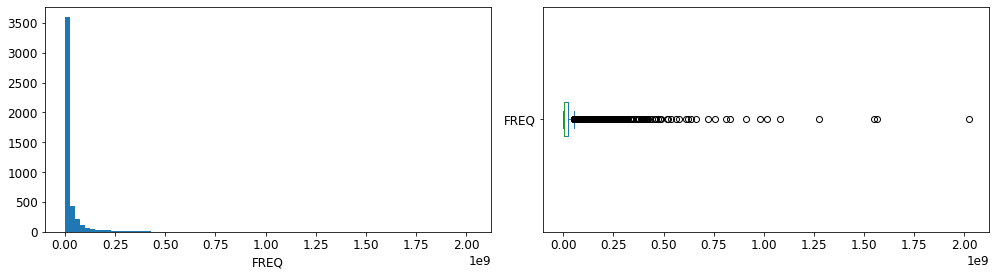

In [38]:
# Rappresentazione grafica della distribuzione della variabile FREQ

plt.figure(figsize = (14, 4))

plt.subplot(121)
df['FREQ'].hist(bins = 80, grid = False)
plt.xlabel('FREQ')

plt.subplot(122)
df['FREQ'].plot.box(vert = False)

plt.tight_layout()
plt.show()

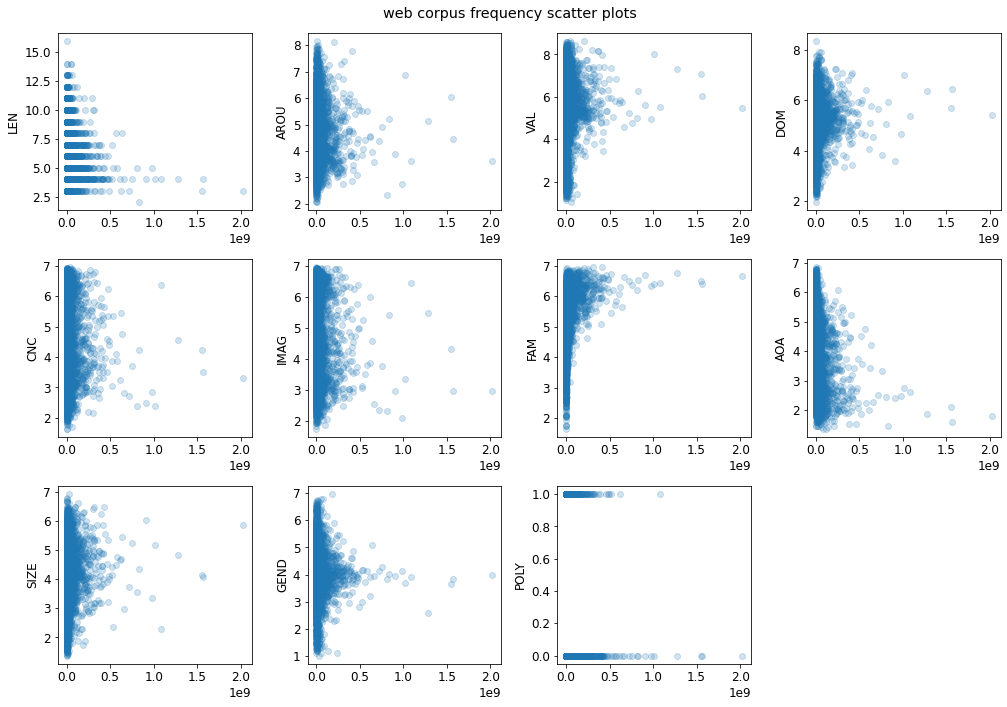

In [39]:
# proviamo a printare gli scatter plot che coinvolgono la variabile FREQ

plt.figure(figsize=(14, 10))

for i, attribute in enumerate(df.columns.tolist(), 1):
    if attribute != 'FREQ':
        plt.subplot(3, 4, i)
        plt.scatter(df['FREQ'], df[attribute], alpha = 0.2)
        plt.ylabel(attribute)
    

plt.suptitle('web corpus frequency scatter plots')
plt.tight_layout()
plt.show()

Né lo z-score standard, né le sue varianti teoricamente più robuste riescono a ridurre gli outlier dell'attributo attributo *web corpus frequency*. Per questo tipo di distribuzioni con distorsione positiva una trasformazione particolarmente adatta è quella logaritmica:

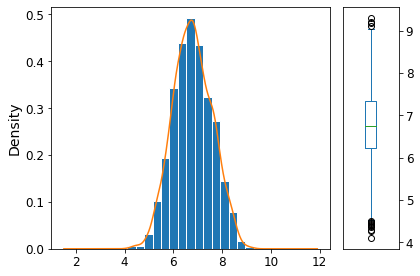

In [254]:
# trasformazione logaritmica in base 10 della variabile FREQ

new_FREQ = df['FREQ'].apply(np.log10)

fig, axs = plt.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios':[5,1]}, figsize=(6, 4))

new_FREQ.hist(ax = axs[0], density = True, bins = 15, edgecolor='white')
new_FREQ.plot.kde(ax=axs[0])
axs[0].set_ylabel('Density', fontsize=14)

new_FREQ.plot.box(ax = axs[1], widths = 0.2)
axs[1].set_xticklabels([])
axs[1].yaxis.tick_right()
axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.tight_layout()
# plt.savefig('freq.pdf',format = 'pdf')
plt.show()

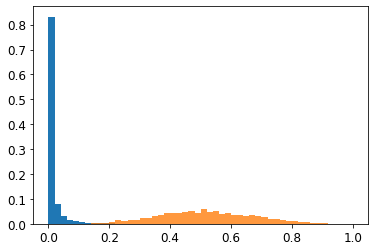

In [41]:
old_FREQ = pd.Series((MinMaxScaler().fit_transform(df['FREQ'].values.reshape(-1,1))).reshape(-1,))
new_FREQ = pd.Series((MinMaxScaler().fit_transform(new_FREQ.values.reshape(-1,1))).reshape(-1,))

plt.figure(figsize = (6,4))
old_FREQ.hist(weights = np.ones(old_FREQ.count())/old_FREQ.count(), bins = 50)
#old_FREQ.plot.kde()
new_FREQ.hist(weights = np.ones(old_FREQ.count())/old_FREQ.count(), bins = 50, alpha = 0.8)
#new_FREQ.plot.kde()

plt.grid(False)
plt.show()

Dopo la trasformazione logaritmica la variabile *web corpus frequency* viene ad assumere una skew prossima allo 0:

In [42]:
print(f"skew[Log(FREQ)] = {skew(df['FREQ'].apply(np.log10)):.2f}")

skew[Log(FREQ)] = 0.04


I miglioramenti apportati dalla trasformazione logaritmica sembrano notevoli. Per tale motivo si decide di rendere permanente la trasformazione del suddetto attributo. Inoltre, se proviamo a ricalcolare le correlazioni tra la variabile *web corpus frequency* e gli altri attributi, possiamo notare come adesso i coefficienti di Pearson e di Spearman quasi si equivalgono.

In [19]:
# sostituzione dell'attributo FREQ con log10(FREQ)

df['FREQ'] = df['FREQ'].apply(np.log10)
df = df.rename(columns={'FREQ': 'Log(FREQ)'})
df.head(0)

Empty DataFrame
Columns: [LEN, AROU, VAL, DOM, CNC, IMAG, FAM, AOA, SIZE, GEND, POLY, Log(FREQ)]
Index: []

In [44]:
(df.corr()[['Log(FREQ)']].T).drop('Log(FREQ)', axis = 1)

LEN   AROU   VAL   DOM    CNC   IMAG   FAM   AOA  SIZE    GEND  \
Log(FREQ) -0.242 0.0629 0.294 0.218 0.0187 0.0198 0.578 -0.42 0.158 -0.0605   

           POLY  
Log(FREQ) 0.192

In [45]:
(df.corr(method = 'spearman')[['Log(FREQ)']].T).drop('Log(FREQ)', axis = 1)

LEN   AROU  VAL   DOM    CNC   IMAG  FAM    AOA  SIZE    GEND  \
Log(FREQ) -0.244 0.0686  0.3 0.223 0.0253 0.0226 0.58 -0.413 0.161 -0.0753   

           POLY  
Log(FREQ) 0.194

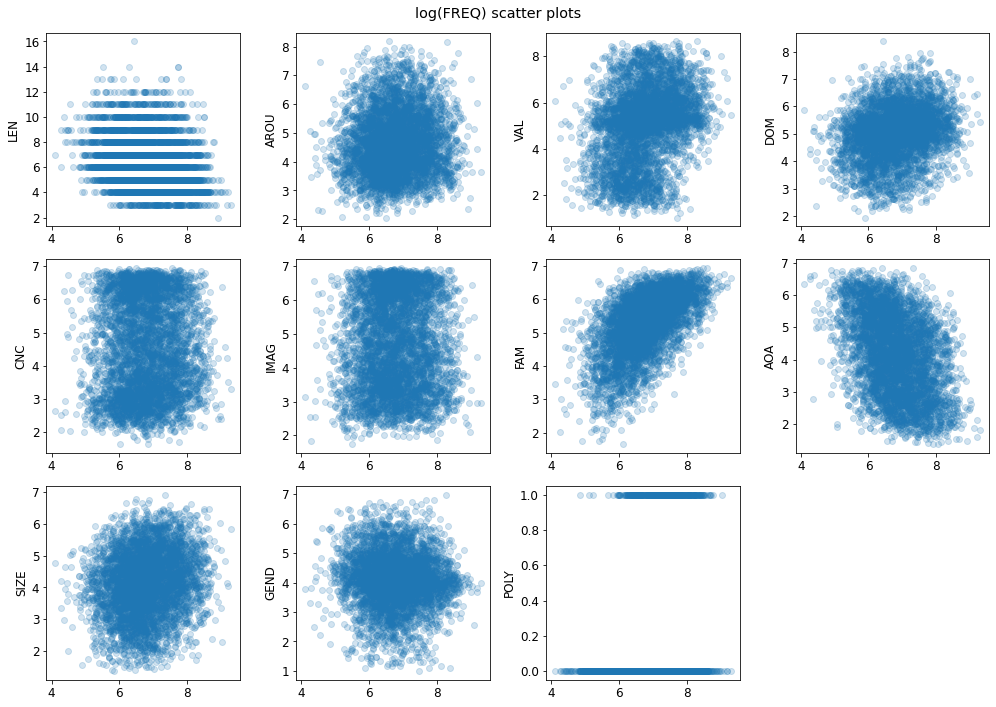

In [46]:
plt.figure(figsize=(14, 10))

for i, attribute in enumerate(df.columns.tolist(), 1):
    if attribute != 'Log(FREQ)':
        plt.subplot(3, 4, i)
        plt.scatter(df['Log(FREQ)'], df[attribute], alpha = 0.2)
        plt.ylabel(attribute)
    

plt.suptitle('log(FREQ) scatter plots')
plt.tight_layout()
plt.show()

Di seguito si cerca di applicare un qualche tipo di trasforazione monotona crescente anche alle altre variabili distorte del dataset.

La variabile *familiarity*, con un valore skew = -0.77 e leggermente distorta a sinistra. Applicando ad essa una trasformazione cubica riusciamo ad eliminare quasi totalmente tale distorsione, portandola a skew = 0.01:

In [47]:
print(f"   skew[FAM] = {skew(df['FAM']):.2f}")
print(f"skew[FAM**3] = {skew(df['FAM'].apply(lambda x: x**3)):.2f}")

   skew[FAM] = -0.77
skew[FAM**3] = 0.01


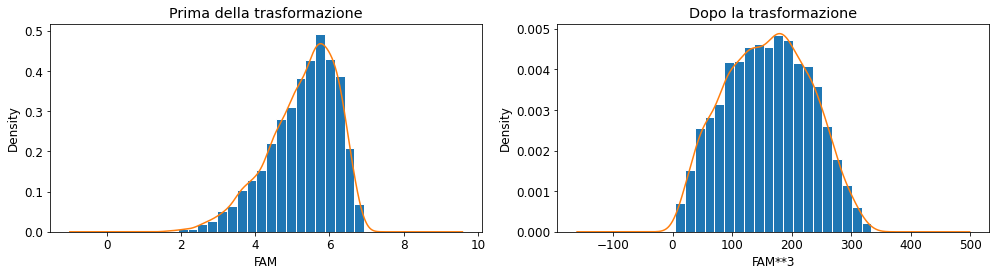

In [48]:
# trasformazione cubica della variabile FAM

new_FAM = df['FAM'].apply(lambda x: x**3)

plt.figure(figsize = (14, 4))

plt.subplot(1,2,1)
df['FAM'].hist(density = True, bins = 20, edgecolor='white')
df['FAM'].plot.kde()
plt.xlabel('FAM')
plt.title('Prima della trasformazione')

plt.subplot(1,2,2)
new_FAM.plot.hist(density = True, bins = 20, grid = False, edgecolor='white')
new_FAM.plot.kde()
plt.xlabel('FAM**3')
plt.title('Dopo la trasformazione')


plt.tight_layout()
plt.show()

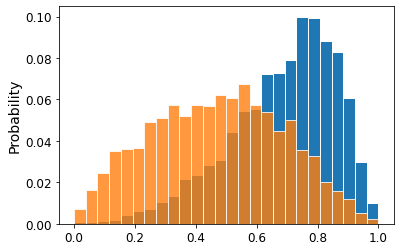

In [255]:
old_FAM = pd.Series((MinMaxScaler().fit_transform(df['FAM'].values.reshape(-1,1))).reshape(-1,))
new_FAM = pd.Series((MinMaxScaler().fit_transform(new_FAM.values.reshape(-1,1))).reshape(-1,))

plt.figure(figsize = (6,4))
old_FAM.hist(weights=np.ones(len(old_FAM))/len(old_FAM), bins = 26, edgecolor='white')
#old_FAM.plot.kde()
new_FAM.hist(weights=np.ones(len(new_FAM))/len(new_FAM), bins = 26, alpha = 0.8, edgecolor='white')
#new_FAM.plot.kde()
plt.ylabel('Probability', fontsize=14)
plt.grid(False)
# plt.savefig('FAM_transformation.pdf',format = 'pdf', bbox_inches="tight")
plt.show()

L'attributo *arousal*, invece, soffre di una leggera distorsione positiva (skew = 0.42). Tale distorsione viene più che compensata attraverso l'applicazione di una trasformazione logaritmica (di base 2) che le conferisce una skew = -0.11:

In [50]:
print(f"skew[AROU] = {skew(df['AROU']):.2f}")
print(f"skew[ln(AROU)] = {skew(df['AROU'].apply(np.log)):.2f}")

skew[AROU] = 0.42
skew[ln(AROU)] = -0.11


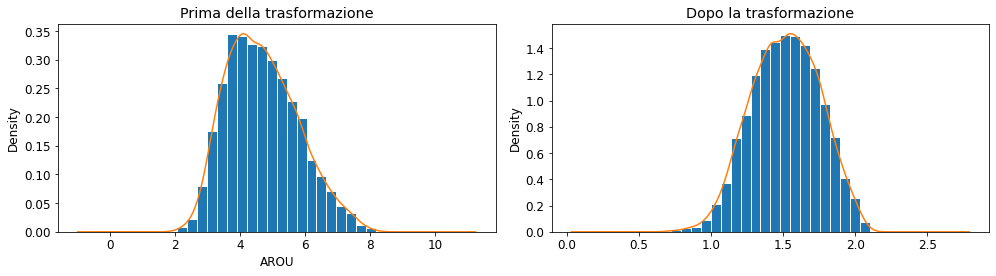

In [51]:
# trasformazione logaritmica naturale della variabile AROU

new_AROU = df['AROU'].apply(np.log)

plt.figure(figsize = (14,4))

plt.subplot(121)
df['AROU'].hist(density = True, bins = 20, edgecolor='white')
df['AROU'].plot.kde()
plt.xlabel('AROU')
plt.title('Prima della trasformazione')

plt.subplot(122)
new_AROU.hist(density = True, bins = 20, edgecolor='white')
new_AROU.plot.kde()
# plt.xlabel('ln(AROU)')
plt.title('Dopo la trasformazione')

plt.tight_layout()
plt.show()

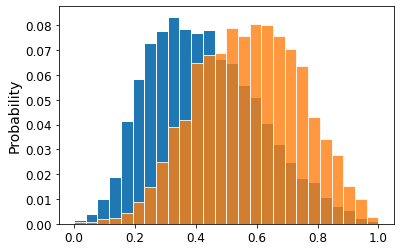

In [256]:
old_AROU = pd.Series((MinMaxScaler().fit_transform(df['AROU'].values.reshape(-1,1))).reshape(-1,))
new_AROU = pd.Series((MinMaxScaler().fit_transform(new_AROU.values.reshape(-1,1))).reshape(-1,))

plt.figure(figsize = (6,4))
old_AROU.hist(weights=np.ones(len(old_AROU))/len(old_AROU), bins = 26, edgecolor='white')
#old_AROU.plot.kde()
new_AROU.hist(weights=np.ones(len(new_AROU))/len(new_AROU), bins = 26, alpha = 0.8, edgecolor='white')
#new_AROU.plot.kde()
plt.grid(False)
plt.ylabel('Probability', fontsize=14)
# plt.savefig('AROU_transformation.pdf',format = 'pdf', bbox_inches="tight")
plt.show()

In [20]:
# modifico permanentemente le variabili e ne cambio il nome

df['AROU'] = df['AROU'].apply(np.log)
df['FAM'] = df['FAM'].apply(lambda x: x**3)

df = df.rename(columns={'AROU': 'ln(AROU)', 'FAM': 'FAM**3'})
df.head(0)

Empty DataFrame
Columns: [LEN, ln(AROU), VAL, DOM, CNC, IMAG, FAM**3, AOA, SIZE, GEND, POLY, Log(FREQ)]
Index: []

Oltre alla *frequency*, siamo riusciti a correggere la distorsione delle variabili *familiarity* e *arousal* applicando ad esse, rispettivamente,  una trasformazione cubica ed una logaritmica e abbiamo reso permanenti tali cambiamenti aggiornando il dataset originale. Invece, per quanto riguarda le variabili *valence*, *concreateness* e *imageability*, a causa della loro distribuzione bimodale, non è stato possibile trovare una trasformazione soddisfacente.

In [54]:
# riepilogo della distorsione di tutti gli attributi

skew_df(df)

LEN ln(AROU)    VAL    DOM   CNC   IMAG FAM**3    AOA   SIZE   GEND  \
skew  0.66    -0.11  -0.30  -0.26  0.03  -0.03   0.01  -0.04  -0.17  -0.25   

      POLY Log(FREQ)  
skew  3.07      0.04

In [55]:
# ricontrollo il dominio (syntactic accuracy) per vedere come si è modificato dopo le trasformazioni

df.describe().round(2).loc[['min', 'max', 'std']]

LEN  ln(AROU)  VAL  DOM  CNC  IMAG  FAM**3  AOA  SIZE  GEND  POLY  \
min    2      0.72 1.03 1.94 1.64  1.74    4.47 1.22  1.38     1     0   
max   16       2.1 8.65 8.37 6.94  6.94     334 6.97  6.91  6.97     1   
std 2.01      0.24 1.59 0.93 1.43  1.36    70.8 1.25  1.02  0.91  0.27   

     Log(FREQ)  
min       4.11  
max       9.31  
std        0.8

# Outilers

## Singoli attributi (Outlier Detection for Single Attributes)

Come misura degli outlier usiamo una variazione della curtosi che ci permette di fare un confronto diretto con la distribuzione normale. La curtosi altro non è che il valore atteso delle osservazioni standardizzate elevate a quattro. Le uniche osservazioni che contribuiscono in maniera significativa al valore della curtosi sono quelle molto distanti dalla media, cioè gli outlier. La funzione che useremo è la seguente:
$$\mathrm{kurt}[X] = \mathrm{E}\Bigg[\bigg(\dfrac{X - \bar{x}}{\sigma_{X}}\bigg)^{4}\Bigg] - 3$$
Così definita, la curtosi della distribuzione normale è pari a 0. Una curtosi negativa segnala una distribuzione platicurtica, caratterizzata da pochi outlier e non estremi; mentre una curtosi positiva caratterizza le variabili leptocurtiche, che presentano un numero maggiore di outlier e in generale eventi più estremi. Sono tre i fattori che condizionano la curtosi:
- la numerosità degli outlier (aumentandola);
- la loro distanza dalla media (aumentandola);
- la numerosità campionaria (diminuendola).

Per grandi campioni la numerosità degli outlier è ciò che influisce maggiormente sul valore della curtosi.

**nota:**
Questo in realtà è uno stimatore distorto della curtosi della popolazione. Tuttavia, la numerosità campionaria è tale da minimizzare tale distorsione.

## metodo dello z-score

In [21]:
# standardizzo il dataset ad eccezione della variabile binaria polisemy

df_z = z_normalization(df)
df_z = df_z.drop(['LEN','POLY', 'Log(FREQ)'], axis = 1)

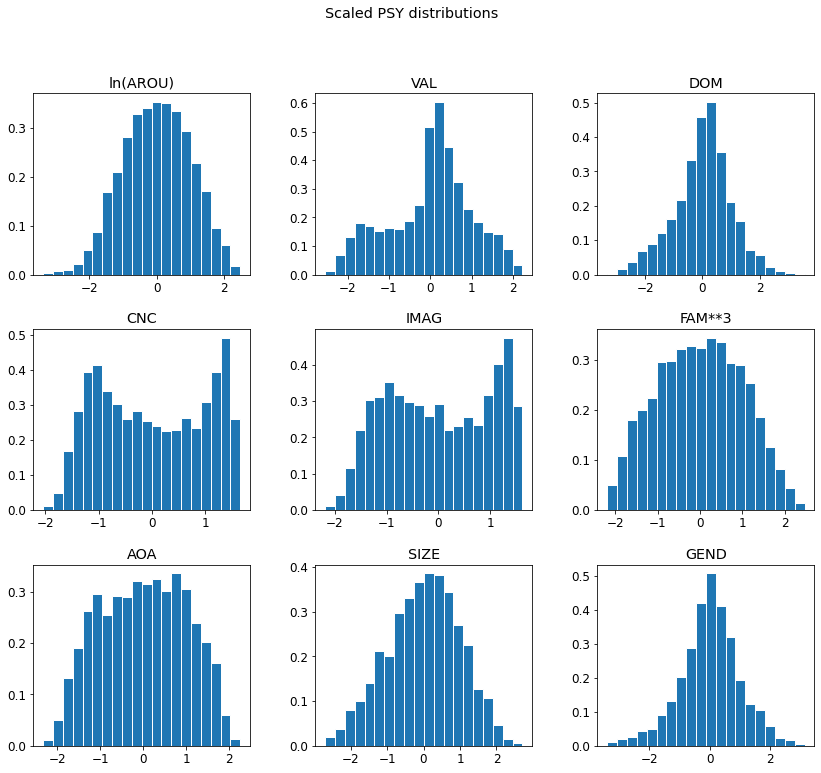

In [57]:
df_z.hist(density = True, bins = 20, figsize=(14,12), grid=False, edgecolor='white')
plt.suptitle('Scaled PSY distributions')
plt.show()

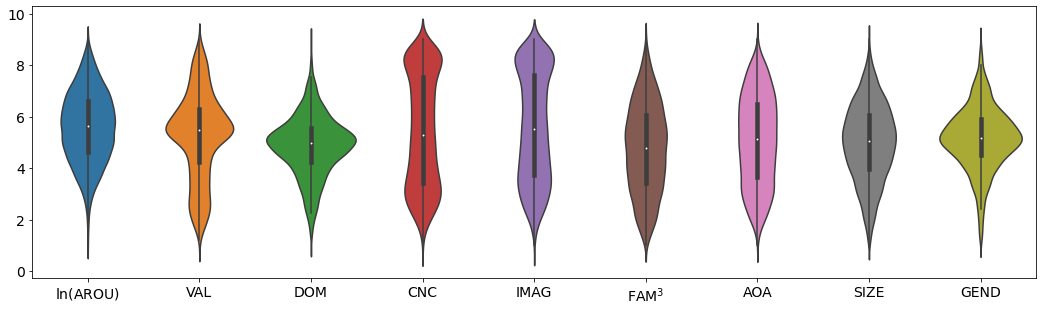

In [25]:
psy_df = df.drop(['LEN', 'POLY', 'Log(FREQ)'], axis = 1)
minmax_df = MinMaxScaler(feature_range=(1, 9)).fit_transform(psy_df.values)
minmax_df = pd.DataFrame(minmax_df, columns=df_z.columns)
plt.figure(figsize=(18,5))
ax = sns.violinplot(data = minmax_df)
xticks = ['$\ln(\mathrm{AROU})$', 'VAL', 'DOM', 'CNC', 'IMAG', '$\mathrm{FAM}^3$', 'AOA', 'SIZE',
       'GEND']
plt.xticks (range(9),xticks)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig('violinplot2.pdf', format = 'pdf', bbox_inches="tight")
plt.show()

In [59]:
df_z.describe().loc[['std', 'mean', 'min','max']]

ln(AROU)     VAL      DOM      CNC     IMAG    FAM**3      AOA     SIZE  \
std          1       1        1        1        1         1        1        1   
mean -3.45e-15 3.9e-15 3.94e-14 7.29e-15 1.21e-14 -9.54e-15 4.81e-15 3.07e-15   
min      -3.36   -2.54    -3.34    -2.04    -2.19     -2.19    -2.33     -2.7   
max       2.48    2.23     3.57     1.65     1.63      2.47     2.26     2.71   

         GEND  
std         1  
mean 7.45e-15  
min      -3.4  
max      3.15

Di solito come valori $|z_{ij}| > k$ con $k \in \{2.5,3,3.5\}$ possono essere considerati come valori estremi e quindi rimossi dal dataset. Contiamo quanti sono:

In [24]:
outlier_df = pd.concat(
    [df_z[df_z.abs() >= th].count() for th in [2.5, 3, 3.5]], 
    axis = 1)
outlier_df.index.rename('|z|', inplace = True)
outlier_df.rename({0:'> 2.5', 1:'> 3', 2:'> 3.5'}, axis = 1, inplace = True)
outlier_df = outlier_df.T
outlier_df

|z|    ln(AROU)  VAL  DOM  CNC  IMAG  FAM**3  AOA  SIZE  GEND
> 2.5        25    1   74    0     0       0    0    20   113
> 3           6    0    7    0     0       0    0     0    25
> 3.5         0    0    1    0     0       0    0     0     0

Righe potenzialmente da eliminare:

In [29]:
missing_values = df[df.isna().any(axis=1)].index

In [49]:
len(missing_values)

14

In [45]:
for th in [2.5, 3.0, 3.5]:
    print(f"{'Threshold = ' + str(th) :*^41}")
    tmp = df_z[(df_z.abs() > th).any(axis=1)]
    rm = len(set(missing_values) - set(tmp.index))
    print(f"Number of outliers found: {tmp.shape[0]}")
    print(f"Number of missing values remaining: {rm}", end="\n\n")

*************Threshold = 2.5*************
Number of outliers found: 230
Number of missing values remaining: 9

*************Threshold = 3.0*************
Number of outliers found: 38
Number of missing values remaining: 11

*************Threshold = 3.5*************
Number of outliers found: 1
Number of missing values remaining: 14



In [47]:
# Let's see the outlier found with th = 3.5

tmp

ln(AROU)    VAL  DOM   CNC   IMAG  FAM**3  AOA  SIZE  GEND
word                                                                
dominate      1.77 -0.719 3.57 -1.23 -0.614  -0.118 1.07  1.77  1.71

Non eliminiamo direttamente i record perché altrimenti il dataset non sarebbe più standardizzato, cioè non avrebbe più media = 0 e varianza unitaria. Quindi, prima trovo i record da eliminare, poi li elimino dal dataset non standardizzato e infine standardizzo nuovamente. Eventualmente poi reitero il procedimento.

In [59]:
th = 3
cleaned_df = df.drop(['LEN', 'POLY', 'Log(FREQ)'], axis = 1)
flag = True

while flag:
    cleaned_df_z = z_normalization(cleaned_df)
    mask = (cleaned_df_z.abs() > th).any(axis=1)
    outlier_words = cleaned_df_z[mask].index.tolist()
    cleaned_df = cleaned_df.drop(outlier_words, axis = 0)
    n_outliers = len(outlier_words)
    print("Number of outliers removed:", n_outliers)
    flag = n_outliers

Number of outliers removed: 38
Number of outliers removed: 12
Number of outliers removed: 6
Number of outliers removed: 1
Number of outliers removed: 0


In [60]:
cleaned_df.shape[0]

4625

In [64]:
# total number of outliers removed

df.shape[0] - cleaned_df.shape[0]

57

## Metodo boxplot

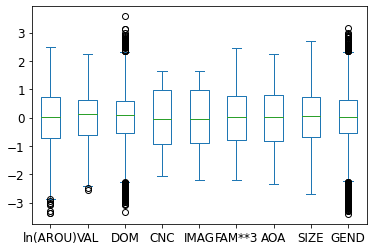

In [78]:
df_z.plot.box(figsize = (6, 4))
plt.show()

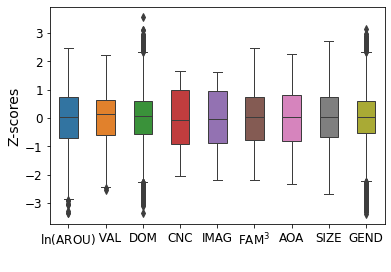

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_z, width=0.5, linewidth=1)
xticks = ['$\ln(\mathrm{AROU})$', '  VAL', 'DOM', 'CNC', 'IMAG', '$\mathrm{FAM}^3$', 'AOA', 'SIZE',
       'GEND']
plt.xticks (range(9),xticks)
plt.xlabel(' ')
plt.ylabel('Z-scores', fontsize=14)
# plt.savefig('boxplots_seaborn.pdf', format = 'pdf', bbox_inches = 'tight')
plt.show()

Dai box plot possiamo capire non solo quali distribuzioni presentino osservazioni estreme ma possiamo anche farci un'idea della loro frequenza e magnitudine. Tuttavia, abbiamo bisogno di strumenti specifici per misurare la gravità di questo fenomeno. Il box plot sopra riportato ci obbliga ad indagare su quattro attributi: *arousal, valence, dominance e gender*. 

Di seguito si procederà a calcolare gli outlier dei signoli attributi così come li computa il box plot; per ogni attributo $X_i$ del dataset, con $1 \leq i \leq m$, l'insieme degli outlier è così definito:

\begin{equation}
\big\{x_{ij} \in X_{i} \; | \; x_{ij} < Q_{1} - 1.5(Q_{3} - Q_{1}) \lor  x_{ij} > Q_{3} + 1.5(Q_{3} - Q_{1}) \big\}
\end{equation}

dove $Q_{1}$ e $Q_{3}$ rappresentano, rispettivamente, il primo ed il terzo quartile. Questo range di valori è anche definito come "barriere di Turkey".

In [80]:
# Per ogni attributo computo la curtosi. 

kurt_df(df_z)

ln(AROU)    VAL   DOM    CNC   IMAG FAM**3    AOA   SIZE  GEND
curtosi    -0.44  -0.44  0.29  -1.36  -1.29  -0.79  -0.97  -0.44  0.60

In [81]:
kurt_df(df_z, unbiased = True)

ln(AROU)    VAL   DOM    CNC   IMAG FAM**3    AOA   SIZE  GEND
curtosi    -0.44  -0.44  0.29  -1.36  -1.29  -0.79  -0.97  -0.44  0.60

In [82]:
from scipy.stats import kurtosis, kurtosistest

In [83]:
kurtosis(df_z.values, fisher=True, bias=False).round(2)

array([-0.44, -0.44,  0.29, -1.36, -1.29, -0.79, -0.97, -0.44,  0.6 ])

In [84]:
z_test, p_value = kurtosistest(df_z.values)
for zp in zip(df_z.columns, z_test, p_value):
    print(*zp)

ln(AROU) -8.004309578719413 1.2013880385356158e-15
VAL -7.856403610015557 3.953198230625276e-15
DOM 3.585843898284351 0.00033598990646257733
CNC 294.3608398902283 0.0
IMAG -115.3182674694305 0.0
FAM**3 -19.378282149397407 1.1771112968880496e-83
AOA -29.995471925432906 1.1242870966226526e-197
SIZE -8.029388844229718 9.795941883771345e-16
GEND 6.557921642369669 5.4562864391921375e-11


In [85]:
z_test, p_value = kurtosistest(df_z.values, alternative = 'less')
for zp in zip(df_z.columns, z_test, p_value):
    print(*zp)

ln(AROU) -8.004309578719413 6.006940192678079e-16
VAL -7.856403610015557 1.976599115312638e-15
DOM 3.585843898284351 0.9998320050467687
CNC 294.3608398902283 1.0
IMAG -115.3182674694305 0.0
FAM**3 -19.378282149397407 5.885556484440248e-84
AOA -29.995471925432906 5.621435483113263e-198
SIZE -8.029388844229718 4.897970941885672e-16
GEND 6.557921642369669 0.9999999999727186


In [86]:
z_test, p_value = kurtosistest(df_z.values, alternative = 'greater')
for zp in zip(df_z.columns, z_test, p_value):
    print(*zp)

ln(AROU) -8.004309578719413 0.9999999999999994
VAL -7.856403610015557 0.999999999999998
DOM 3.585843898284351 0.00016799495323128867
CNC 294.3608398902283 0.0
IMAG -115.3182674694305 1.0
FAM**3 -19.378282149397407 1.0
AOA -29.995471925432906 1.0
SIZE -8.029388844229718 0.9999999999999996
GEND 6.557921642369669 2.7281432195960688e-11


In [87]:
# Per ogni attributo conto il numero di outlier (xi < Q1 - 1.5IQR e xi > Q3 + 1.5IQR).

outlier_detector(df_z)

ln(AROU)  VAL  DOM  CNC  IMAG  FAM**3  AOA  SIZE  GEND
outliers         8    2  133    0     0       0    0     0   164

In [88]:
outlier_detector(df_z, perc = True)

Notare che per la maggior parte delle variabili la curtosi è bassa, segno questo che gli outlier non dovrebbero essere un grande problema. Gli attributi `ln(AROU)`, `VAL`, `FAM**3`, `AOA` e `SIZE` hanno una un andamento pseudo-normale e una curtosi negativa e sono, quindi, distribuzioni platicurtiche. Questo tipo di distribuzioni presentano un numero ed un'intensità (estremità) di outlier inferiore rispetto ad una gaussiana, per la quale ci aspettiamo che gli outlier rappresentino il 4.8% circa di tutte le osservazioni. Questo è anche confermato dai valori percentuali degli outlier nel dataframe sopra. Le variabili `CNC` e `IMAG` accentuano ancora di più queste caratteristiche perché oltre ad essere platicurtiche hanno una distribuzione quasi uniforme. Questo tipo di distribuzioni sono, infatti, prive di outlier. Infine, possiamo osservare che sono solo due le variabili leptocurtiche: `DOM` e `GEND`. Come ci aspettavamo questi sono gli attributi che presentano più osservazioni estreme. La percentuale degli outlier, però, è comunque inferiore al 4.8% di una gaussiana e questo, probabilmente, è dovuto al fatto che le distribuzioni non siano perfettamente normali.

Infine, un'osservazione sulla variabile `length`, `polysemy` e `web corpus frequency`: siccome l'insieme di parole oggetto dello studio è state definito in fase di progettazione dell'esperimento, per queste variabili si è ritenuto che non fosse necessario procedere alla rimozione degli outliers.

In [89]:
df_z.shape

(4682, 9)

Number of outliers removed: 303



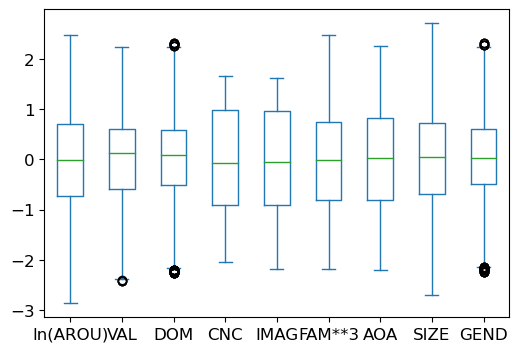

Number of outliers removed: 67



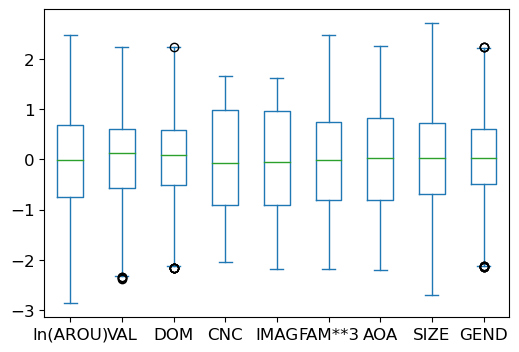

Number of outliers removed: 22



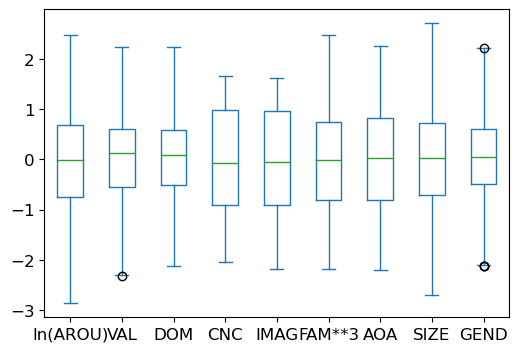

Number of outliers removed: 5



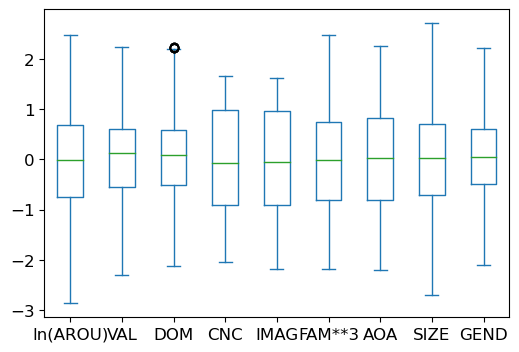

Number of outliers removed: 7



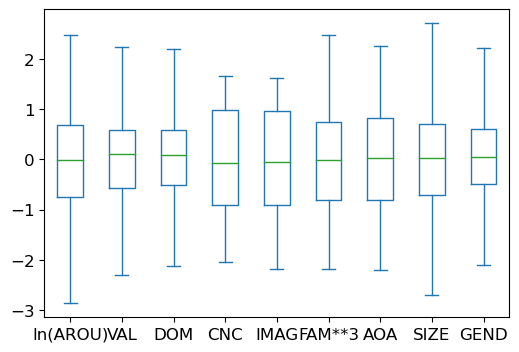

Number of outliers removed: 0



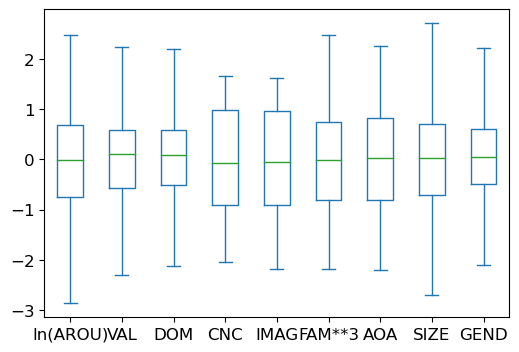

In [68]:
cleaned_df = df_z
flag = True

while flag:
    pre_size = cleaned_df.shape[0]
    cleaned_df = remove_outliers(cleaned_df)
    post_size = cleaned_df.shape[0]
    n_outliers = pre_size - post_size
    print("Number of outliers removed:", n_outliers, end="\n\n")
    flag = n_outliers
    pre_size = post_size    
    cleaned_df.plot.box(figsize=(6,4))
    plt.show()

In [70]:
# Total number of outliers removed

df.shape[0] - cleaned_df.shape[0]

404

In [100]:
cleaned_df.describe().loc[['mean', 'std', 'min', 'max']]

ln(AROU)     VAL    DOM    CNC    IMAG  FAM**3    AOA    SIZE   GEND
mean   -0.0395 0.00693 0.0341 0.0014 -0.0172 -0.0221 0.0115 -0.0217 0.0467
std      0.984   0.949  0.892  0.996       1    1.01      1   0.994  0.858
min      -2.87    -2.3  -2.13  -2.04   -2.19   -2.19  -2.21    -2.7  -2.11
max       2.48    2.23    2.2   1.65    1.63    2.47   2.26    2.71   2.21

togliamo dal dataset iniziale le righe da eliminare e standardizziamo

In [101]:
cleaned_df = df.loc[cleaned_df.index]
cleaned_df = cleaned_df.drop(['LEN','POLY', 'Log(FREQ)'], axis = 1)
cleaned_df.shape[0]

4278

In [102]:
cleaned_df_z = z_normalization(cleaned_df)
cleaned_df.describe().loc[['mean', 'std', 'min', 'max']]

ln(AROU)  VAL  DOM  CNC  IMAG  FAM**3  AOA  SIZE  GEND
mean      1.51  5.1 5.08 4.57   4.7     158 4.16  4.11  4.14
std      0.232 1.51 0.83 1.43  1.37    71.3 1.25  1.02 0.783
min      0.839 1.42 3.06 1.64  1.74    4.47 1.37  1.38  2.18
max        2.1 8.65  7.1 6.94  6.94     334 6.97  6.91  6.12

Questa strategia per eliminare gli outlier ha il difetto che necessita di essere iterata. Infatti, ogni volta che l'algoritmo viene lanciato il dataset si riduce ma così facendo cambiano anche le statistiche di posizione utilizzate per calcolare gli outlier nel round precedente. Nel caso in esame abbiamo dovuto iterare per ben 5 volte portando all'eliminazione di 404 righe. Ciò nonostante, come si può osservare sotto, i risultati ottenuti in termini di restrizione del dominio e di abbattimento della varianza sono marginali, eccezion fatta per gli attributi che erano maggiormente affetti da questo probelma: `DOM, VAL.

In [103]:
# DF STANDARDIZZATO CON OUTLIER

a = df_z.describe().loc[['mean', 'std', 'min', 'max']]
a

ln(AROU)     VAL      DOM      CNC     IMAG    FAM**3      AOA     SIZE  \
mean -3.45e-15 3.9e-15 3.94e-14 7.29e-15 1.21e-14 -9.54e-15 4.81e-15 3.07e-15   
std          1       1        1        1        1         1        1        1   
min      -3.36   -2.54    -3.34    -2.04    -2.19     -2.19    -2.33     -2.7   
max       2.48    2.23     3.57     1.65     1.63      2.47     2.26     2.71   

         GEND  
mean 7.45e-15  
std         1  
min      -3.4  
max      3.15

In [104]:
# DF STANDARDIZZATO SENZA OUTLIER

b = cleaned_df_z.describe().loc[['mean','std', 'min', 'max']]
b

ln(AROU)       VAL      DOM       CNC  IMAG    FAM**3       AOA  \
mean  3.31e-15 -6.13e-16 2.62e-14 -1.27e-15 1e-14 -4.62e-15 -4.74e-15   
std          1         1        1         1     1         1         1   
min      -2.87     -2.43    -2.43     -2.05 -2.16     -2.15     -2.23   
max       2.56      2.35     2.43      1.66  1.64      2.47      2.25   

         SIZE      GEND  
mean 6.02e-15 -7.04e-15  
std         1         1  
min     -2.69     -2.51  
max      2.75      2.52

In [105]:
# DIFFERENZA TRA I DUE 

a - b

ln(AROU)       VAL       DOM      CNC     IMAG    FAM**3       AOA  \
mean -6.76e-15  4.51e-15  1.32e-14 8.55e-15 2.12e-15 -4.92e-15  9.54e-15   
std   3.55e-15 -4.44e-15 -3.11e-15 1.11e-16 4.66e-15     3e-15 -2.89e-15   
min     -0.489    -0.115    -0.904  0.00975  -0.0264   -0.0374    -0.109   
max    -0.0816    -0.114      1.14 -0.00534  -0.0103  -0.00448    0.0104   

          SIZE     GEND  
mean -2.95e-15 1.45e-14  
std  -1.55e-15 1.78e-15  
min   -0.00533   -0.886  
max    -0.0384    0.623

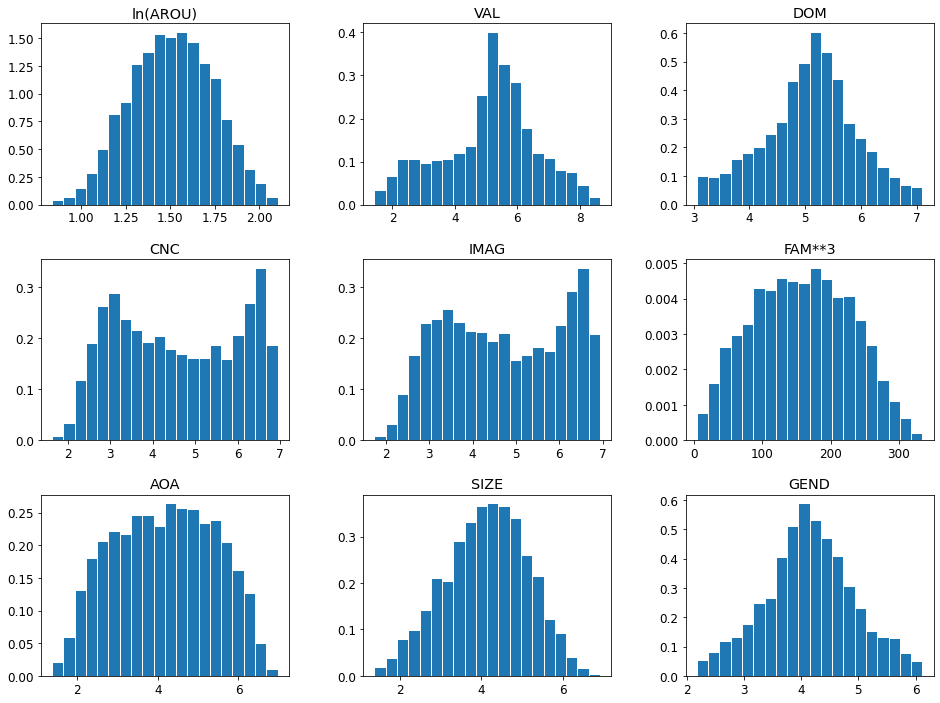

In [106]:
cleaned_df.hist(density = True, figsize = (16,12), bins = 20, grid = False, edgecolor='white') #  sharey = True,
plt.show()

## Outlier Detection for Multidimensional Data

### Principal Component Analysis

Prima ci siamo occupati di scovare gli outlier delle singole distribuzioni univariate. Adesso utilizzando la Principal Components Analysis andiamo ad ci focalizziamo sull'Outlier Detection for Multidimensional Data. In particolare, andiamo a vedere se è possibile ridurre la dimensionalità del dataset preservando la qualità dei dati.

In [243]:
 ### IL DATASET È STANDARDIZZATO; CI SONO GLI OUTLIER; 

X = df_z
pca = PCA(n_components = 9).fit(X)
projected = pca.transform(X)

idx = X.index
projected = pd.DataFrame(projected, columns = ['pc1','pc2','pc3','pc4','pc5', 'pc6', 'pc7', 'pc8', 'pc9'], index = idx)

In [244]:
pca.explained_variance_ratio_

array([0.3012593 , 0.25771067, 0.13238514, 0.12702765, 0.08060855,
       0.04555549, 0.02731199, 0.02065412, 0.0074871 ])

In [245]:
cumulated_expl_var = list(accumulate(pca.explained_variance_ratio_))
cumulated_expl_var = pd.Series(cumulated_expl_var, index = np.arange(1,10))
cumulated_expl_var

1   0.301
2   0.559
3   0.691
4   0.818
5   0.899
6   0.945
7   0.972
8   0.993
9       1
dtype: float64

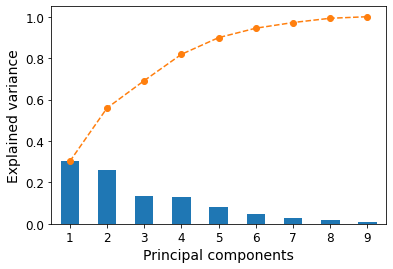

In [265]:
plt.figure(figsize=(6,4))
pd.Series(pca.explained_variance_ratio_, index = np.arange(1,10)).plot.bar(rot=0)
plt.plot(range(9), cumulated_expl_var, 'o--', color=my_colors[1])
plt.xlabel('Principal components', fontsize=14)
plt.ylabel('Explained variance', fontsize=14)
# plt.savefig('pca.pdf', format = 'pdf', bbox_inches = 'tight')
plt.show()

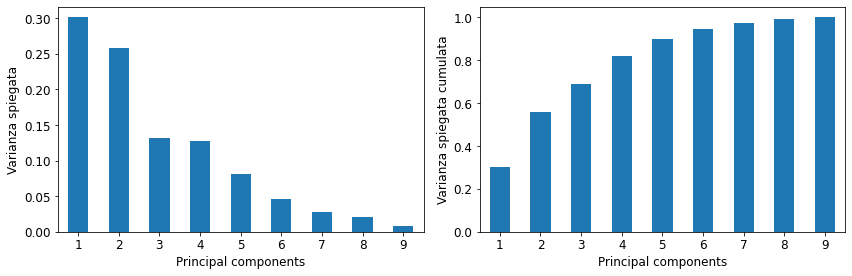

In [111]:
# scree plot

plt.figure(figsize=(12,4))
#plt.suptitle('Scree plot')

plt.subplot(121)
pd.Series(pca.explained_variance_ratio_, index = np.arange(1,10)).plot.bar(rot=0)
plt.xlabel('Principal components')
plt.ylabel('Varianza spiegata')

plt.subplot(122)
cumulated_expl_var.plot.bar(rot = 0)
plt.xlabel('Principal components')
plt.ylabel('Varianza spiegata cumulata')

plt.tight_layout()
plt.show()

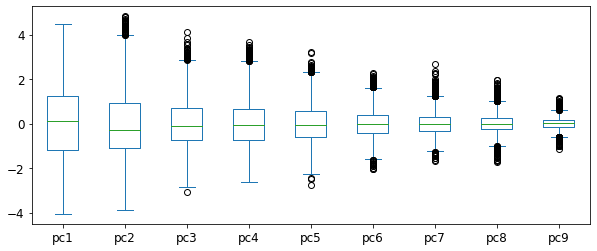

In [112]:
projected.plot.box(figsize=(10,4)) # ricorda che stiamo usando il dataset non pulito
plt.show()

In [113]:
### IL DATASET È STANDARDIZZATO; SENZA OUTLIER 

X = cleaned_df_z
pca = PCA(n_components = 9).fit(X)
projected = pca.transform(X)

idx = X.index
projected = pd.DataFrame(projected, columns = ['pc1','pc2','pc3','pc4','pc5', 'pc6', 'pc7', 'pc8', 'pc9'], index = idx)

In [114]:
pca.explained_variance_ratio_

array([0.29929815, 0.26262012, 0.13611756, 0.12474996, 0.07456352,
       0.04785708, 0.02608258, 0.02161081, 0.0071002 ])

In [115]:
cumulated_expl_var = list(accumulate(pca.explained_variance_ratio_))
cumulated_expl_var = pd.Series(cumulated_expl_var, index = np.arange(1,10))
cumulated_expl_var

1   0.299
2   0.562
3   0.698
4   0.823
5   0.897
6   0.945
7   0.971
8   0.993
9       1
dtype: float64

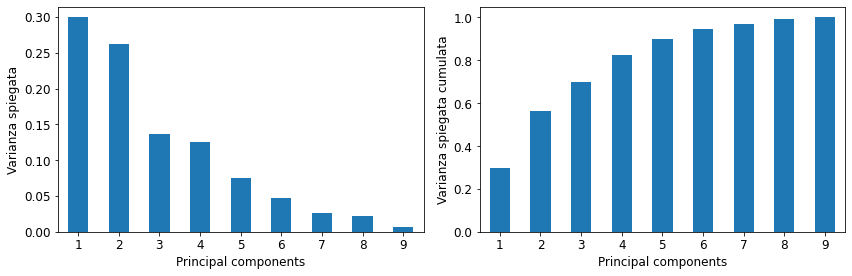

In [116]:
plt.figure(figsize=(12,4))
#plt.suptitle('Scree plot')

plt.subplot(121)
pd.Series(pca.explained_variance_ratio_, index = np.arange(1,10)).plot.bar(rot=0)
plt.xlabel('Principal components')
plt.ylabel('Varianza spiegata')

plt.subplot(122)
cumulated_expl_var.plot.bar(rot = 0)
plt.xlabel('Principal components')
plt.ylabel('Varianza spiegata cumulata')

plt.tight_layout()
plt.show()

Anche utilizzando il dataset privo di outlier non si ottengono miglioramenti significativi. Tutte le prove effettuate, infatti, ci dicono che non è possibile utilizzare una rappresentazione grafica semplicifata di 2 o 3 principal component perché la varianza spiegata cumulata  non è sufficientemente elevata. Due principal component, congiuntamente, spiegano appena il 56% della varianza totale; tre, ne spiegano approssimativamente il 70%. Questi valori non risultano soddisfacenti per una rappresentazione accurata dei dati. Per tale motivo riteniamo che non sia utile utilizzare questa tecnica per scovare gli outlier dal dataset.

# Regressione per predire i missing value di Log(FREQ)

Per provare a predirre i valori mancanti dell'attributo *web corpus frequency* utilizzeremo una regressione lineare. Tuttavia, ci sono alcune variabili del dataset fortemente correlate tra di loro e questo porterebbe i regressori del modello ad essere, seppur in modo imperfetto, collineari. Di conseguenza otterremmo un modello con coefficienti stimati distorti, caratterizzati da uno standard error elevato e che potrebbero portare all'overfitting, cioè a previsioni inattendibili con dati non appartenenti al campione originario. 

Affronteremo questo problema servendoci di un partizionamento randomico del dataset: l'80% viene riservato per allenare il modello e il restante 20% per valutare l'attendibilità delle previsioni effettuate.

In [117]:
# REGRESSIONE EFFETTUATA UTILIZZANDO L'INTERO DATASET STANDARDIZZATO SENZA OUTLIER
Z = z_normalization(df)
Z = Z.loc[cleaned_df_z.index]
Z = Z[Z['Log(FREQ)'].isna() == False]
X = Z.drop('Log(FREQ)', axis = 1).values
y = Z['Log(FREQ)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
model = LinearRegression().fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test, squared = False)
rmse_train = mean_squared_error(y_train, y_pred_train, squared = False)
print(f" R2 (test) = {r2_test:.2f},\n R2 (train) = {r2_train:.2f},\n RMSE (test) = {rmse_test:.2f},\n RMSE (train) = {rmse_train:.2f}")

 R2 (test) = 0.50,
 R2 (train) = 0.52,
 RMSE (test) = 0.71,
 RMSE (train) = 0.70


In [118]:
print(adj_r2(r2_test, X_test.shape[0], X_test.shape[1]-1))
print(adj_r2(r2_train, X_test.shape[0], X_train.shape[1]-1))

0.4978251407358557
0.5115442122370779


In [119]:
# REGRESSIONE EFFETTUATA UTILIZZANDO L'INTERO DATASET STANDARDIZZATO
Z = z_normalization(df)
Z = Z[df['Log(FREQ)'].isna() == False]
X = Z.drop('Log(FREQ)', axis = 1).values
y = Z['Log(FREQ)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
model = LinearRegression().fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test, squared = False)
rmse_train = mean_squared_error(y_train, y_pred_train, squared = False)
print(f" R2 (test) = {r2_test:.2f},\n R2 (train) = {r2_train:.2f},\n RMSE (test) = {rmse_test:.2f},\n RMSE (train) = {rmse_train:.2f}")

 R2 (test) = 0.47,
 R2 (train) = 0.51,
 RMSE (test) = 0.72,
 RMSE (train) = 0.70


In [120]:
print(adj_r2(r2_test, X_test.shape[0], X_test.shape[1]-1))
print(adj_r2(r2_train, X_test.shape[0], X_train.shape[1]-1))

0.46469715903875186
0.5054168772720337


Come si può vedere dalle analisi di regressioni effettuate, l'utilizzo del dataset privo di outlier porta ad un miglioramento marginale dell'indice $R^2$ e ad un peggioramento del Root Mean Square Error (RMSE). (Presentare le differenze tra i dati dei due modelli printati sopra). Inoltre dal momento che RMSE test e train sono praticamente uguali non dovrebbero esserci problemi di overfitting. 

Utilizziamo il primo modello per predire i valori mancanti di *web corpus frequency*:

In [121]:
# i regressori trovati:
model.coef_

array([-0.22036762, -0.13896927,  0.24628517, -0.03394406,  0.34242064,
       -0.43448177,  0.52143455, -0.08147933,  0.28453572,  0.05806927,
        0.09690412])

In [122]:
model.intercept_

-0.000986385328476964

In [123]:
# predico i dati mancanti con i regressori trovati

coeff = model.coef_
interc = model.intercept_
df_na = (df - df.mean()) / df.std()
df_na = df_na[df_na['Log(FREQ)'].isna()].drop('Log(FREQ)', axis = 1).T
iterpolated_FREQ = []
for col in df_na.columns:
    iterpolated_FREQ.append(interc + np.dot(coeff, df_na[col]))

iterpolated_FREQ = pd.Series(iterpolated_FREQ) #valori predetti standardizzati
iterpolated_FREQ = iterpolated_FREQ * df['Log(FREQ)'].std() + df['Log(FREQ)'].mean() #valori predetti non standardizzati
iterpolated_FREQ = iterpolated_FREQ.tolist()

df_filled = df.copy()
df_filled.loc[df_filled['Log(FREQ)'].isna(), 'Log(FREQ)'] = iterpolated_FREQ # sovrascrivo i nan con i valori predetti

In [124]:
freq_filled = df_filled[['Log(FREQ)']].loc[df_na.columns.tolist()].rename_axis("").T
freq_filled.T

Log(FREQ)
                    
burgle          6.43
Christmas       7.71
Dad             8.61
Dame            6.36
Facebook        7.49
FALSE           7.22
Mom             8.24
Mum             8.45
Mummy           7.44
skijump         6.48
TRUE            8.06
TV              7.85
Twitter         7.06
yo-yo           5.99

In [125]:
df[['Log(FREQ)']].describe().loc['mean':'max'].T # original distribution

mean   std  min  25%  50%  75%  max
Log(FREQ)  6.78 0.801 4.11 6.22 6.76 7.35 9.31

Come sospettavamo, escludendo *burgle, dame, skijump* e *yo-yo*, le altre sono tutte parole ad alta frequenza. I valori ci sembrano ragionevoli, per tale motivo decidiamo di mantenerli all'interno del dataset.

In [126]:
coeff_stimati = [('β0', interc), *zip(df_filled.columns.tolist(), coeff)]
coeff_stimati = pd.DataFrame({k:[v.round(2)] for k,v in coeff_stimati})
coeff_stimati 


β0   LEN  ln(AROU)  VAL   DOM  CNC  IMAG  FAM**3   AOA  SIZE  GEND  POLY
0  -0 -0.22     -0.14 0.25 -0.03 0.34 -0.43    0.52 -0.08  0.28  0.06   0.1

Dal momento che abbiamo appurato che gli outlier non sono un problema per il nostro dataset – specialmente dopo la trasformazione logaritmica di web corpus frequency – decidiamo di effettuare una normalizzazione min-max del dataset al fine di rimanere coerenti con il dominio iniziale delle variabili del nostro dataset. Questo tipo di normalizzazione ha il vantaggio di non modificare la distribuzione originale dei punteggi, tranne che per un fattore di scala che moltiplicato per i valori iniziali li riporta in un intervallo comune. Decidimo quindi di far variare tutti gli attributi nel range $[1,9]$.

https://stats.stackexchange.com/questions/7757/data-normalization-and-standardization-in-neural-networks

https://www.researchgate.net/post/Does-normalizing-data-affect-its-statistical-distribution

In [127]:
minmax = MinMaxScaler(feature_range=(1, 9)).fit_transform(df_filled.values)
df_filled_minmax = pd.DataFrame(minmax, index = df_filled.index, columns = df_filled.columns)
df_filled_minmax['LEN'] = df_filled['LEN'].values
df_filled_minmax['POLY'] = df_filled['POLY'].values
df_filled_minmax['Log(FREQ)'] = df_filled['Log(FREQ)'].values

del minmax

In [128]:
df_filled_minmax.describe().loc[['min','max', 'std']]

LEN  ln(AROU)  VAL  DOM  CNC  IMAG  FAM**3  AOA  SIZE  GEND  POLY  \
min    2         1    1    1    1     1       1    1     1     1     0   
max   16         9    9    9    9     9       9    9     9     9     1   
std 2.01      1.37 1.67 1.16 2.16   2.1    1.72 1.74  1.48  1.22 0.273   

     Log(FREQ)  
min       4.11  
max       9.31  
std      0.802

In [129]:
df_filled_z = z_normalization(df_filled)

# Correlazioni attributi

In [130]:
my_color = sns.choose_colorbrewer_palette('diverging', as_cmap=True)

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

In [131]:
my_color = sns.color_palette('RdBu_r', n_colors = 9, as_cmap = True)

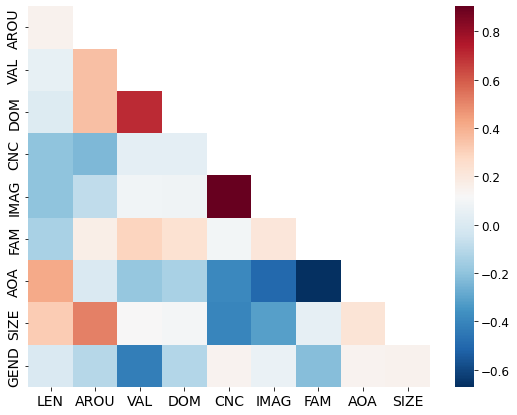

In [260]:
# Controllo le correlazioni lineari tra tutte le variabili

plt.figure(figsize = (9,7))

df_corr = df.drop('POLY', axis = 1).rename(columns={'ln(AROU)': 'AROU', 'FAM**3': 'FAM'})
corr = df_corr.corr('spearman').loc['AROU':'GEND', 'LEN':'SIZE']
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, 0.)
sns.heatmap(corr, mask = mask, annot=False, cbar=True, cmap=my_color)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig('heatmap_sp.pdf', format = 'pdf', bbox_inches = 'tight')
plt.show()

In [133]:
# df_corr = df_filled_minmax.rename(columns={'ln(AROU)': 'AROU', 'FAM**3': 'FAM'})
# corr_xpair = 'CNC VAL FAM AROU IMAG CNC'.split()
# corr_ypair = 'IMAG DOM AOA SIZE AOA SIZE'.split()
# corr_pair = list(zip(corr_xpair, corr_ypair))
# plt.figure(figsize=(6,8))
# for i, pair in enumerate(corr_pair, start=1):
#     plt.subplot(3,2,i)
#     plt.scatter(df_corr[pair[0]], df_corr[pair[1]], alpha =0.4, s = 4.)
#     sns.regplot(x=pair[0], y=pair[1], data=df_corr, scatter=False, color = 'k')# scatter_kws={'alpha':0.05}, line_kws={'color':'k'})
#     sns.regplot(x=pair[0], y=pair[1], data=df_corr, order=2, scatter=False, color = 'red')

# plt.tight_layout()
# # plt.savefig('correlations.pdf', format = 'pdf', bbox_inches = 'tight')
# plt.show()

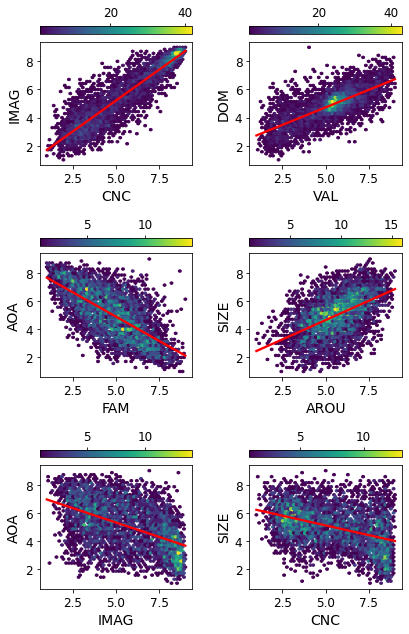

In [263]:
df_corr = df_filled_minmax.rename(columns={'ln(AROU)': 'AROU', 'FAM**3': 'FAM'})
corr_xpair = 'CNC VAL FAM AROU IMAG CNC'.split()
corr_ypair = 'IMAG DOM AOA SIZE AOA SIZE'.split()
corr_pair = list(zip(corr_xpair, corr_ypair))
plt.figure(figsize=(6,9))
for i, pair in enumerate(corr_pair, start=1):
    plt.subplot(3,2,i)
    plt.hexbin(df_corr[pair[0]], df_corr[pair[1]], mincnt=1, gridsize = 50)
#     plt.scatter(df_corr[pair[0]], df_corr[pair[1]], alpha =1., s = 10)
    sns.regplot(x=pair[0], y=pair[1], data=df_corr, scatter=False, color = 'red')# scatter_kws={'alpha':0.05}, line_kws={'color':'k', 'linewidth':2})
#     sns.regplot(x=pair[0], y=pair[1], data=df_corr, order=2, scatter=False, color = 'red')
#     plt.xlim(1,9)
#     plt.ylim(1,9)
    plt.xlabel(pair[0], fontsize=14)
    plt.ylabel(pair[1], fontsize=14)
    plt.colorbar(location='top')
plt.tight_layout()
# plt.savefig('correlations.pdf', format = 'pdf', bbox_inches = 'tight')
plt.show()

In [135]:
# df_corr = df_filled_minmax.loc[:, 'LEN':'GEND'].rename(columns={'ln(AROU)': 'AROU', 'FAM**3': 'FAM'})
# corr_pair = combinations(df_corr.columns, 2)
# plt.figure(figsize=(20,20))
# for i, pair in enumerate(corr_pair, start=1):
#     plt.subplot(8,6,i)
#     plt.scatter(df_corr[pair[0]], df_corr[pair[1]], alpha =0.5, s = 3.)
#     sns.regplot(x=pair[0], y=pair[1], data=df_corr, scatter=False, color = 'red')# scatter_kws={'alpha':0.05}, line_kws={'color':'k'})
#     sns.regplot(x=pair[0], y=pair[1], data=df_corr, order=2, scatter=False, color = 'k')

# plt.tight_layout()
# plt.show()

## Discretizzazione delle variabili non psicolinguistiche

### LEN attribute

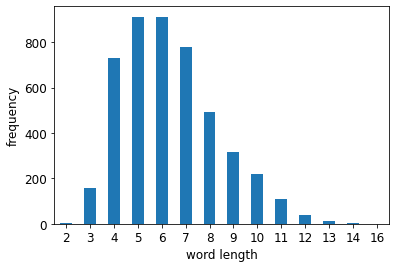

In [136]:
lengths_sorted = df_filled['LEN'].sort_values()
lengths_sorted.value_counts().sort_index().plot.bar(rot = 0)
plt.xlabel('word length')
plt.ylabel('frequency')
plt.show()

In [137]:
df_filled[['LEN']].describe().loc[['min', 'max', 'std']].T

min  max  std
LEN    2   16 2.01

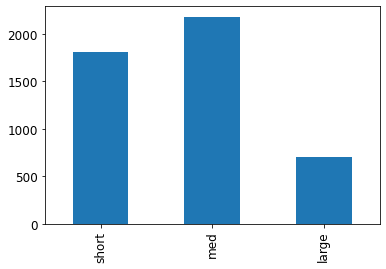

(5, 8]     2179
(1, 5]     1803
(8, 16]     700
Name: LEN, dtype: int64

In [138]:
#intervalli specificati a mano

new_len = pd.cut(df_filled['LEN'], [1,5,8,16])
new_len_lab = pd.cut(df_filled['LEN'], [1,5,8,16], labels=["short", "med", "large"])
new_len_lab.value_counts().sort_index().plot.bar()
plt.show()
new_len.value_counts()

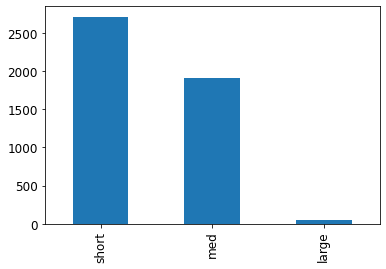

(1.99, 6.667]     2713
(6.67, 11.333]    1914
(11.33, 16.0]       55
Name: LEN, dtype: int64

In [139]:
# intervalli di eguale ampiezza

new_len = pd.cut(df_filled['LEN'], 3).apply(lambda x: pd.Interval(left=round(x.left,2), right=x.right)) 
new_len_lab = pd.cut(df_filled['LEN'], 3, labels=["short", "med", "large"])
new_len_lab.value_counts().sort_index().plot.bar()
plt.show()
new_len.value_counts()

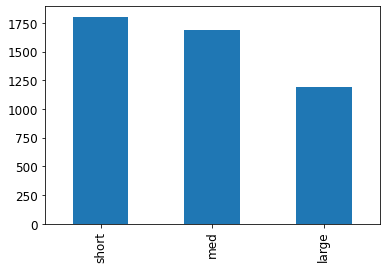

(2.0, 5.0]     1803
(5.0, 7.0]     1687
(7.0, 16.0]    1192
Name: LEN, dtype: int64

In [140]:
# in qcut, the number of elements in each bin will be roughly the same, but this will come at the cost of  
# differently sized interval widths. Frequencies are not guaranteed to be the same because of repeating values 
# (they must stay in the same bin). For example, setting  q=5, pandas cut the attribute column into 5 equal   
# quantiles, i.e. 0-20%, 20-40%, 40-60%, 60-80% and 80-100% buckets/bins.

# intervalli di simile frequenza

new_len = pd.qcut(df_filled['LEN'], 3).apply(lambda x: pd.Interval(left=round(x.left,1), right=x.right)) 
new_len_lab = pd.qcut(df_filled['LEN'], 3, labels=["short", "med", "large"])
new_len_lab.value_counts().sort_index().plot.bar()
plt.show()
new_len.value_counts()

In [141]:
# discretizzazione con KMeans (KBinsDiscretizer)

attribute = df_filled['LEN'].values.reshape(-1,1)
new_len = KBinsDiscretizer(n_bins=3, encode = 'ordinal', strategy='kmeans').fit(attribute)
tr_len = new_len.transform(attribute)

In [142]:
df_len = pd.DataFrame(columns = ['LEN', 'label'])
df_len['LEN'] = df_filled['LEN']
df_len['label'] = tr_len.reshape(-1,)

In [143]:
df_len.head()

LEN  label
word                  
abattoir      8      1
abbey         5      0
abbreviate   10      2
abdicate      8      1
abdication   10      2

In [144]:
df_len.groupby('label').count()

LEN
label      
0      2713
1      1585
2       384

In [145]:
new_len.bin_edges_

array([array([ 2.        ,  6.32840384,  9.16837622, 16.        ])],
      dtype=object)

In [146]:
# map label e intervalli

ranges = {}
r = 0
l = new_len.bin_edges_[0][0]
for lab, value in enumerate(new_len.bin_edges_[0][1:]):
    r = round(value, 1)
    if r == 16.0:
        ranges[lab] = pd.Interval(left = l, right = r, closed = 'both')
    else:
        ranges[lab] = pd.Interval(left = l, right = r, closed = 'left')
    l = round(value, 1)
ranges

{0: Interval(2.0, 6.3, closed='left'),
 1: Interval(6.3, 9.2, closed='left'),
 2: Interval(9.2, 16.0, closed='both')}

In [147]:
# sostituisco i label con gli intervalli

for lab, rg in ranges.items():
    df_len.loc[df_len['label'] == lab, 'label'] = rg
df_len = df_len.rename(columns={"label": "range"}) 
df_len.head()

LEN        range
word                        
abattoir      8   [6.3, 9.2)
abbey         5   [2.0, 6.3)
abbreviate   10  [9.2, 16.0]
abdicate      8   [6.3, 9.2)
abdication   10  [9.2, 16.0]

In [148]:
# controllo la correttezza degli intervalli

for word in df_len.index:
    length = df_len.loc[word, 'LEN']
    rg = df_len.loc[word, 'range']
    assert length in rg, (length, rg)

In [149]:
df_len.groupby('range').count()

LEN
range            
[2.0, 6.3)   2713
[6.3, 9.2)   1585
[9.2, 16.0]   384

In [150]:
# associo ad ogni intervallo un label

df_len['label'] = df_len['range']
labels = np.sort(df_len.label.unique())
mymap = dict(zip(['short', 'mid', 'long'], labels))
for lab, rg in mymap.items():
    df_len.loc[df_len['label'] == rg, 'label'] = lab

In [151]:
df_len.head()

LEN        range  label
word                               
abattoir      8   [6.3, 9.2)    mid
abbey         5   [2.0, 6.3)  short
abbreviate   10  [9.2, 16.0]   long
abdicate      8   [6.3, 9.2)    mid
abdication   10  [9.2, 16.0]   long

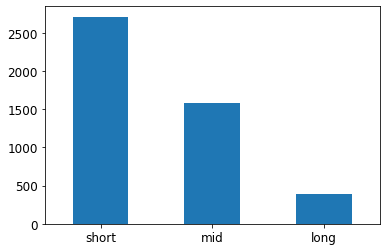

In [152]:
df_len.label.value_counts(sort = True).plot.bar(rot=0)
plt.show()

In [153]:
# deterministic kmeans (come computato dall'algo KBinsDiscretizer)

In [154]:
myinit = np.linspace(2.0, 16.0, num=4) # intervalli di eguale ampiezza come quelli  di pd.cut
myinit 

array([ 2.        ,  6.66666667, 11.33333333, 16.        ])

In [155]:
myinit = (myinit[1:] + myinit[:-1]).reshape(-1,1) *0.5 # media delle coppie adiacenti
myinit

array([[ 4.33333333],
       [ 9.        ],
       [13.66666667]])

In [156]:
# Deterministic initialization with uniform spacing

model = KMeans(3, init = myinit, n_init = 1).fit(df_filled['LEN'].values.reshape(-1,1))

In [157]:
model.inertia_

3551.2323832929515

In [158]:
np.unique(model.labels_, return_counts = True)

(array([0, 1, 2]), array([2713, 1585,  384], dtype=int64))

In [159]:
attribute = df_filled['LEN'].values.reshape(-1,1)
SSEs = []
for k in range(2,11):
    myinit = np.linspace(attribute.min(),attribute.max(), num = k+1)
    myinit = (myinit[1:] + myinit[:-1]).reshape(-1,1) *0.5
    model = KMeans(k, init = myinit, n_init = 1).fit(attribute)
    SSEs.append(model.inertia_)

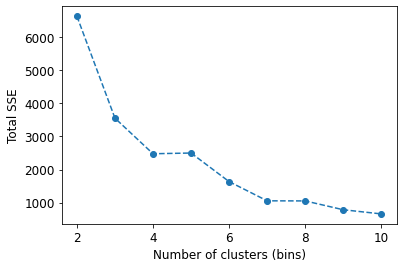

In [160]:
plot_elbow(SSEs, kneelocator = False)
plt.xlabel('Number of clusters (bins)')
plt.show()

In [161]:
SSEs

[6630.886882463776,
 3551.23238329295,
 2476.307908375523,
 2498.114983163312,
 1634.6518823469466,
 1054.2904583676072,
 1051.1787023153986,
 784.7765082137189,
 658.4701355040334]

nel dataset di analisi sostituisco i valori di LEN con in nuovi label

In [162]:
# KMeans stochastic initialization

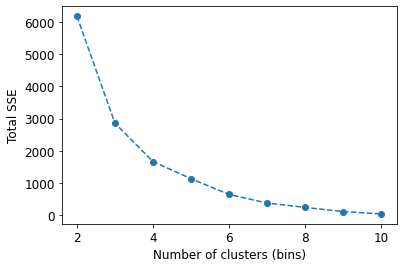

In [180]:
SSEs, models = multi_sse(df_filled['LEN'])
plt.figure(figsize=(6,4))
plot_elbow(SSEs, kneelocator = False)
plt.xlabel('Number of clusters (bins)')
plt.show()

In [181]:
SSEs

[6184.051639333386,
 2856.966344900235,
 1663.619932391855,
 1129.37891043555,
 640.0712059921271,
 372.6312323326185,
 238.6981065252782,
 107.90377341111976,
 35.35666094911379]

In [182]:
models[1].inertia_

2856.966344900235

In [183]:
np.unique(models[1].labels_, return_counts = True)

(array([0, 1, 2]), array([2179,  700, 1803], dtype=int64))

In [184]:
df_len_KM = pd.DataFrame(columns=['LEN', 'range', 'label'])
df_len_KM['LEN'] = df_filled.LEN
df_len_KM['label'] = models[1].labels_

In [185]:
df_len_KM.head()

LEN range  label
word                        
abattoir      8   NaN      0
abbey         5   NaN      2
abbreviate   10   NaN      1
abdicate      8   NaN      0
abdication   10   NaN      1

In [186]:
groups = df_len_KM.groupby('label').agg({'LEN':[min,max]})
groups.columns = ['min', 'max']
groups

min  max
label          
0        6    8
1        9   16
2        2    5

In [187]:
for lab in np.unique(models[1].labels_):
    minimum = groups.loc[lab, 'min']
    maximum = groups.loc[lab, 'max']
    interval = pd.Interval(left = minimum, right = maximum, closed = 'both')
    df_len_KM.loc[df_len_KM['label'] == lab, 'range'] = interval

In [188]:
df_len_KM.head()

LEN    range  label
word                           
abattoir      8   [6, 8]      0
abbey         5   [2, 5]      2
abbreviate   10  [9, 16]      1
abdicate      8   [6, 8]      0
abdication   10  [9, 16]      1

In [189]:
categories = ['Short', 'Med', 'Long']
for i, interval in enumerate(np.unique(df_len_KM['range'])): # sorted unique elements
    df_len_KM.loc[df_len_KM['range'] == interval, 'label'] = categories[i]

In [190]:
df_len_KM.head()

LEN    range  label
word                           
abattoir      8   [6, 8]    Med
abbey         5   [2, 5]  Short
abbreviate   10  [9, 16]   Long
abdicate      8   [6, 8]    Med
abdication   10  [9, 16]   Long

In [191]:
df_len_KM['label'].value_counts()

Med      2179
Short    1803
Long      700
Name: label, dtype: int64

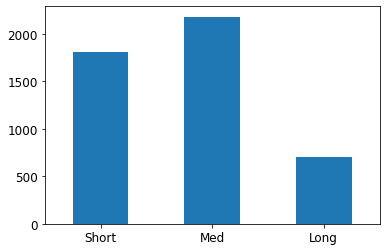

In [242]:
plt.figure(figsize=(6,4))
df_len_KM.sort_values(by='LEN')['label'].value_counts(sort = False).plot.bar(rot=0)
# plt.savefig('discretization.pdf', format = 'pdf', bbox_inches = 'tight')
plt.show()

In [193]:
# modifico permanentemente il dataframe

df_filled_minmax['LEN'] = df_len_KM['label'].values

### FREQ Attribute

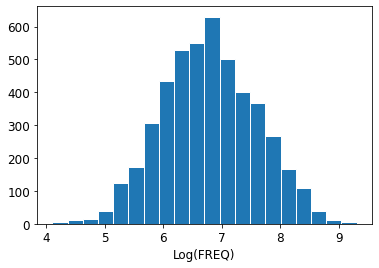

In [194]:
df_filled['Log(FREQ)'].hist(bins = 20, grid = False, edgecolor = 'white')
plt.xlabel('Log(FREQ)')
plt.show()

In [195]:
df_filled[['Log(FREQ)']].describe().loc[['min', 'max', 'std']].T

min  max   std
Log(FREQ) 4.11 9.31 0.802

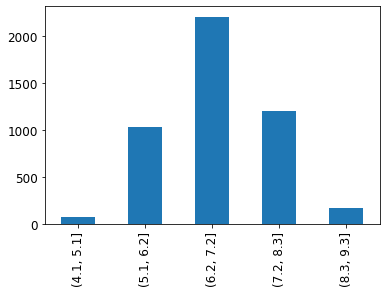

(6.2, 7.2]    2211
(7.2, 8.3]    1202
(5.1, 6.2]    1036
(8.3, 9.3]     164
(4.1, 5.1]      69
Name: Log(FREQ), dtype: int64

In [196]:
# egual width discretization

new_freq = pd.cut(df_filled['Log(FREQ)'], 5).apply(lambda x: pd.Interval(left=round(x.left,1), right=round(x.right, 1)))
new_freq.value_counts().sort_index().plot.bar()
plt.show()
new_freq.value_counts()

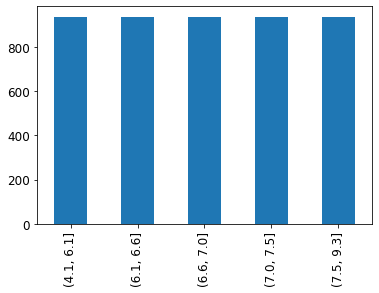

(4.1, 6.1]    937
(7.5, 9.3]    937
(6.1, 6.6]    936
(6.6, 7.0]    936
(7.0, 7.5]    936
Name: Log(FREQ), dtype: int64

In [197]:
# egual frequency discretization

new_freq = pd.qcut(df_filled['Log(FREQ)'], 5).apply(lambda x: pd.Interval(left=round(x.left,1), right=round(x.right, 1)))
new_freq.value_counts().sort_index().plot.bar()
plt.show()
new_freq.value_counts()

In [198]:
# KMeans determistico KBinsDiscretizer 3 bins
attribute = df_filled['Log(FREQ)'].values.reshape(-1,1)
new_freq  = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy='kmeans').fit(attribute)
tr_freq  = new_freq.transform(attribute)

df_freq = pd.DataFrame(columns = ['Log(FREQ)', 'label'])
df_freq['Log(FREQ)'] = df_filled['Log(FREQ)']
df_freq.label = tr_freq.reshape(-1,)

Log(FREQ)
label           
0           1327
1           2085
2           1270

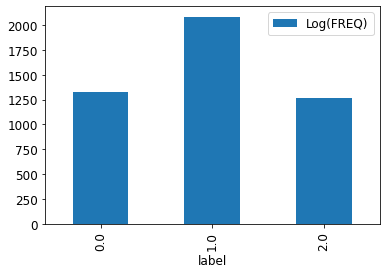

In [199]:
g = df_freq.groupby('label').count()
g.plot.bar()
g

In [200]:
df_freq.groupby('label').agg({'Log(FREQ)':[min,max]})

Log(FREQ)     
            min  max
label               
0          4.11  6.3
1           6.3 7.28
2          7.28 9.31

In [226]:
# KMeans determistico KBinsDiscretizer 5 bins

attribute = df_filled['Log(FREQ)'].values.reshape(-1,1)
new_freq  = KBinsDiscretizer(n_bins=5, encode = 'ordinal', strategy='kmeans').fit(attribute)
tr_freq  = new_freq.transform(attribute)

df_freq = pd.DataFrame(columns = ['Log(FREQ)', 'label'])
df_freq['Log(FREQ)'] = df_filled['Log(FREQ)']
df_freq['label'] = tr_freq.reshape(-1,)

In [227]:
new_freq.bin_edges_

array([array([4.1061909 , 5.81238385, 6.47735224, 7.09402702, 7.76961437,
              9.30587991])                                               ],
      dtype=object)

In [228]:
# mappiamo i label e gli intervalli

ranges = {}
r = 0
l = round(new_freq.bin_edges_[0][0], 1)
maximum = df_freq['Log(FREQ)'].max()
for lab, value in enumerate(new_freq.bin_edges_[0][1:]):
    r = round(value, 2)
    if r == maximum:
        ranges[lab] = pd.Interval(left = l, right = r, closed = 'both')
    else:
        ranges[lab] = pd.Interval(left = l, right = r, closed = 'left')
    l = round(value, 2)
ranges

{0: Interval(4.1, 5.81, closed='left'),
 1: Interval(5.81, 6.48, closed='left'),
 2: Interval(6.48, 7.09, closed='left'),
 3: Interval(7.09, 7.77, closed='left'),
 4: Interval(7.77, 9.31, closed='left')}

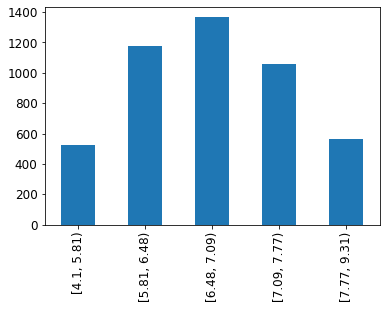

label
range              
[4.1, 5.81)     523
[5.81, 6.48)   1175
[6.48, 7.09)   1365
[7.09, 7.77)   1055
[7.77, 9.31)    564

In [229]:
# aggiungiamo al df gli intervalli

df_freq['range'] = df_freq['label'].values
for lab in df_freq.label.unique():
    df_freq.loc[df_freq.label == lab, 'range'] = ranges[lab]

df_freq['range'].value_counts().sort_index().plot.bar()
plt.show()
df_freq.groupby('range').count()[['label']]

In [230]:
df_freq.tail()

Log(FREQ)  label         range
word                                    
zeppelin        6.5      2  [6.48, 7.09)
zero           7.49      3  [7.09, 7.77)
zest           5.82      1  [5.81, 6.48)
zoo            7.06      2  [6.48, 7.09)
zoology        6.22      1  [5.81, 6.48)

In [231]:
np.unique(df_freq.range)

array([Interval(4.1, 5.81, closed='left'),
       Interval(5.81, 6.48, closed='left'),
       Interval(6.48, 7.09, closed='left'),
       Interval(7.09, 7.77, closed='left'),
       Interval(7.77, 9.31, closed='left')], dtype=object)

In [240]:
unique_ranges = np.unique(df_freq.range)
mymap = dict(zip(['Very Low', 'Low', 'Med', 'High', 'Very High'], unique_ranges))
for lab, rg in mymap.items():
    df_freq.loc[df_freq['range'] == rg, 'label'] = lab   

In [233]:
df_freq.groupby('label').count()

Log(FREQ)  range
label                      
high            1055   1055
low             1175   1175
med             1365   1365
very high        564    564
very low         523    523

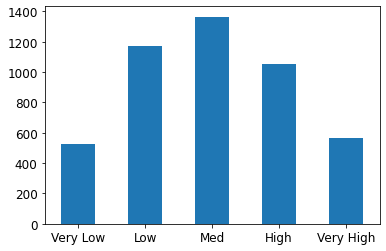

In [241]:
plt.figure(figsize=(6,4))
df_freq.sort_values(by='Log(FREQ)')['label'].value_counts(sort = False).plot.bar(rot=0)
plt.xlabel('')
# plt.savefig('freq_discretization.pdf', format = 'pdf', bbox_inches = 'tight')
plt.show()

In [239]:
# modifico permanentemente il dataset
df_filled_minmax['Log(FREQ)'] = df_freq['label'].values
# df_filled_minmax.to_pickle('df_filled_minmax.pkl')

In [211]:
# KMeans deterministico inizializzazione manuale intervalli di eguale ampiezza

myinit = np.linspace(attribute.min(), attribute.max(), num = 6)
centroids = (myinit[1:] + myinit[:-1]).reshape(-1,1) *0.5 
centroids

array([[4.6261598 ],
       [5.6660976 ],
       [6.7060354 ],
       [7.7459732 ],
       [8.78591101]])

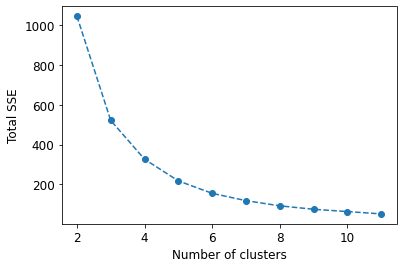

In [212]:
attribute = df_filled['Log(FREQ)'].values.reshape(-1,1)
SSEs = []
for k in range(2,12):
    myinit = np.linspace(attribute.min(),attribute.max(), num = k+1)
    myinit = (myinit[1:] + myinit[:-1]).reshape(-1,1) *0.5
    model = KMeans(k, init = myinit, n_init = 1).fit(attribute)
    SSEs.append(model.inertia_)

plot_elbow(SSEs, kneelocator = False) 

In [213]:
SSEs

[1044.7898844705126,
 521.1528829389149,
 326.17612557498046,
 217.30065329863658,
 154.87431463997606,
 118.11131032155703,
 92.0183819969815,
 74.74841431792876,
 63.25142614902893,
 51.45778907060938]

In [214]:
# KMeans stochastic initialization

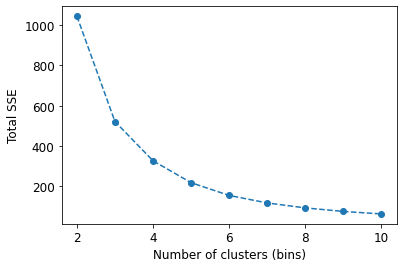

In [215]:
SSEs, models = multi_sse(df_filled['Log(FREQ)'])
plt.figure(figsize=(6,4))
plot_elbow(SSEs, kneelocator = False)
plt.xlabel('Number of clusters (bins)')
plt.show()

In [216]:
SSEs

[1044.7384108824979,
 521.1503042752059,
 326.28083407309464,
 217.36800738468588,
 154.00943782924162,
 116.6640898888248,
 91.99824340946542,
 74.40721050752046,
 62.04417694592719]

In [217]:
df_freq = pd.DataFrame(columns = ['Log(FREQ)', 'label'])
df_freq['Log(FREQ)'] = df_filled['Log(FREQ)']
df_freq['label'] = models[3].labels_
df_freq.groupby('label').agg([min, max])

Log(FREQ)     
            min  max
label               
0          6.47 7.09
1          7.76 9.31
2          5.81 6.47
3          7.09 7.76
4          4.11 5.81

In [218]:
df_freq.groupby('label').count()

Log(FREQ)
label           
0           1363
1            576
2           1171
3           1051
4            521

In [219]:
freq_attr = df_filled['Log(FREQ)'].values.reshape(-1,1)
distances = squareform(pdist(freq_attr))

In [220]:
silh_scores = multi_silh_scores(proximity_mtx=distances, kmeans_models=models)

In [221]:
silh_scores

[0.4892950576444674,
 0.512068528130252,
 0.5058907466247592,
 0.5100014734684156,
 0.5159142985323545,
 0.5173162796877898,
 0.5182684349242335,
 0.5173510395498745,
 0.5193117566568083]

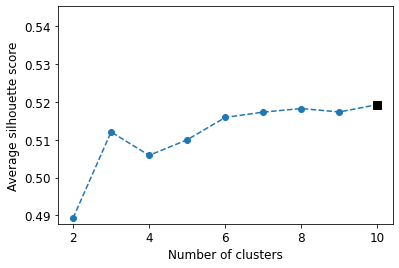

In [222]:
plot_silhouette(silh_scores)

Inizializzazione stocastica e deterministica producono risultati equasi uguali per quanto concerne l'attributo Log(FREQ), probabilmente questo dipende dal fatto che, a differenza di LEN, ha una distribuzione pseudo normale e non distorta.

Dato che LEN e FREQ non sono attributi di tipo psicolinguistico come le altre 9 variabili del dataset si è ritenuto fosse una buona idea procedere alla loro categorizzazione. A tal fine diverse strategie sono state valutate e messe a confronto: intervalli di eguale ampiezza, intervalli a frequenza simile, K-means stocastico e K-means deterministico. 